In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from bs4 import BeautifulSoup as bs
import os
import datetime
from datetime import datetime as dt
from scipy import stats
import seaborn as sns
from tqdm import tqdm
import pickle
import time
import math
from google.colab import output
import cv2
import requests
pd.set_option('display.max_rows',None)


In [ ]:
def get_500_symbols():
    content = requests.get("https://en.wikipedia.org/wiki/List_of_S&P_500_companies").content
    soup = bs(content).find("table", id="constituents")
    symbols_soup = soup.find_all("a", attrs = {"class":"external text", "rel":"nofollow"})
    symbols = [s.text for s in symbols_soup if "reports" not in s.text]
    return symbols

with open("s&p_500_symbols.txt", "wb") as f:
    f.write(pickle.dumps(get_500_symbols()))

505


In [ ]:
def get_dataframe(stock, anaysis_period = 3650*2):
    # A huge epoch that allows most up to date info
    current_epoch = 3000000000
    past_epoch = int((dt.now() - datetime.timedelta(anaysis_period)).timestamp())
    url = f"https://query1.finance.yahoo.com/v7/finance/download/{stock}?period1={past_epoch}&period2={current_epoch}&interval=1d&events=history&includeAdjustedClose=true"
    df = pd.read_csv(url)
    return df

def update_stock_df():
    change_df = pd.DataFrame(columns = ["stock", "change"])
    REPORT_PERIOD = 1
    total_change = 0
    total_stock = 0

    labels = [i/10000 for i in range(500, -1, -25)]
    brightnesses = [i for i in range(255, 34, -11)]

    stock_df = {}
    color_list = []


    symbols = get_500_symbols()

    initialized = False
    i = 1

    for symbol in tqdm(symbols):
        start = time.time()

        try:
            df = get_dataframe(symbol)
            stock_df[symbol] = df

            change = ((df.Close - df.shift(REPORT_PERIOD).Close) / df.shift(REPORT_PERIOD).Close).to_list()[-1]
            idx = 0
            while abs(change) < labels[idx]:
                idx += 1
            brightness = brightnesses[idx]
            if change > 0:
                color = (0, brightness, 0)
            else:
                color = (brightness, 0, 0)

            color_list.append(color)
            color_matrix = []

            color_list = sorted(color_list)

            DIMENSION = int(len(color_list)**(1/2))

            for i in range(DIMENSION):
                color_matrix.append(color_list[i*DIMENSION:(i+1)*DIMENSION])


            if len(color_list) > DIMENSION * DIMENSION:
                a = color_list[DIMENSION * DIMENSION:]
                while len(a) > DIMENSION:
                    color_matrix.append(a[:DIMENSION])
                    a = a[DIMENSION:]
                while len(a) < DIMENSION:
                    a.append((255,255,255))

                color_matrix.append(a)

            plt.clf()
            plt.imshow(color_matrix)
            plt.savefig(f"{i}.png")
            plt.show()

            img = cv2.imread(f"{i}.png")
            height, width, layers = img.shape
            size = (width,height)

            if not initialized:
                out = cv2.VideoWriter(f"output.mp4",cv2.VideoWriter_fourcc(*'DIVX'), 1, size)
                initialized = True


            i += 1
            out.write(img)

            change_df = change_df.append({"stock":symbol, "change":change}, ignore_index=True)
            total_change += change
            total_stock += 1
            print("average change:", round(total_change/total_stock,6)*100, "%")




        except Exception as e:
            print(e)

        while time.time() - start < 1:
            pass

    with open("/content/drive/MyDrive/Investment_Analysis/s&p_500_stock_df.txt", "wb") as f:
        f.write(pickle.dumps(stock_df))
    out.release()

    return change_df

  0%|          | 0/505 [00:00<?, ?it/s]

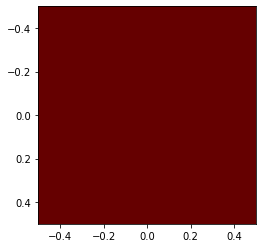

  0%|          | 1/505 [00:01<10:31,  1.25s/it]

average change: -1.6763 %


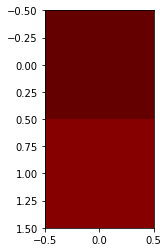

average change: -2.0607 %


  0%|          | 2/505 [00:02<09:18,  1.11s/it]

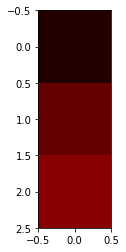

  1%|          | 3/505 [00:03<08:53,  1.06s/it]

average change: -1.4532 %


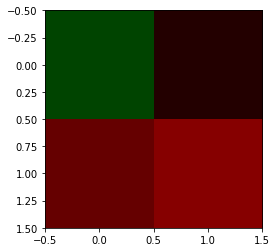

average change: -0.8924 %


  1%|          | 4/505 [00:04<08:41,  1.04s/it]

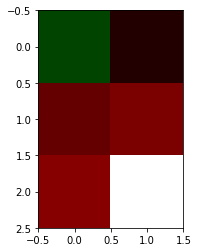

average change: -1.1157 %


  1%|          | 5/505 [00:05<08:34,  1.03s/it]

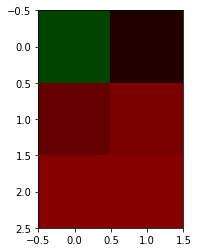

  1%|          | 6/505 [00:06<08:30,  1.02s/it]

average change: -1.3429 %


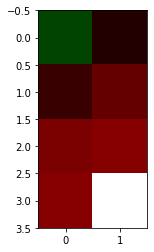

average change: -1.2425 %


  1%|▏         | 7/505 [00:07<08:27,  1.02s/it]

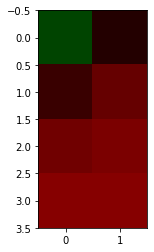

average change: -1.3299999999999998 %


  2%|▏         | 8/505 [00:08<08:27,  1.02s/it]

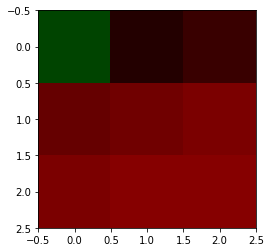

average change: -1.4091 %


  2%|▏         | 9/505 [00:09<08:23,  1.02s/it]

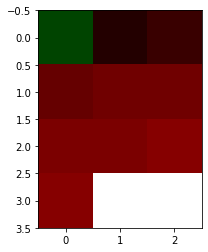

average change: -1.4487999999999999 %


  2%|▏         | 10/505 [00:10<08:20,  1.01s/it]

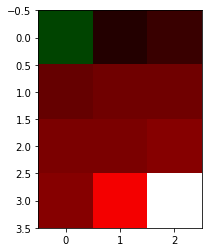

average change: -1.755 %


  2%|▏         | 11/505 [00:11<08:18,  1.01s/it]

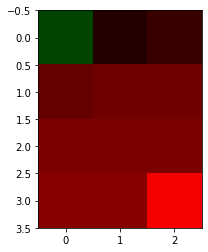

average change: -1.7951000000000001 %


  2%|▏         | 12/505 [00:12<08:16,  1.01s/it]

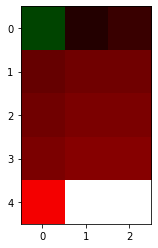

average change: -1.8004 %


  3%|▎         | 13/505 [00:13<08:14,  1.00s/it]

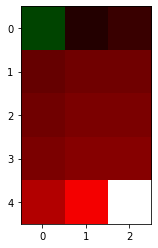

average change: -1.9127 %


  3%|▎         | 14/505 [00:14<08:12,  1.00s/it]

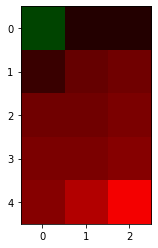

average change: -1.7895 %


  3%|▎         | 15/505 [00:15<08:11,  1.00s/it]

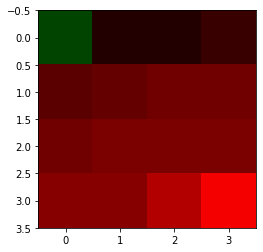

average change: -1.7676999999999998 %


  3%|▎         | 16/505 [00:16<08:10,  1.00s/it]

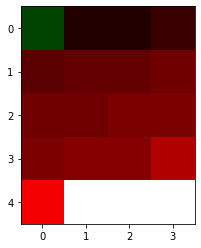

average change: -1.7551 %


  3%|▎         | 17/505 [00:17<08:09,  1.00s/it]

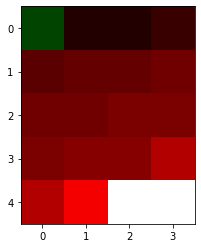

average change: -1.8511 %


  4%|▎         | 18/505 [00:18<08:08,  1.00s/it]

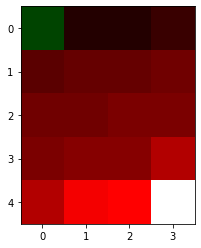

average change: -2.0275000000000003 %


  4%|▍         | 19/505 [00:19<08:07,  1.00s/it]

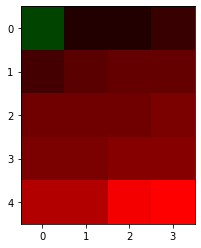

average change: -1.9733 %


  4%|▍         | 20/505 [00:20<08:06,  1.00s/it]

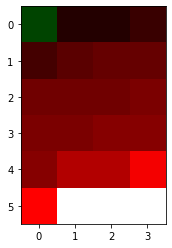

average change: -1.9897000000000002 %


  4%|▍         | 21/505 [00:21<08:04,  1.00s/it]

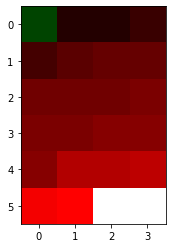

average change: -2.0606 %


  4%|▍         | 22/505 [00:22<08:03,  1.00s/it]

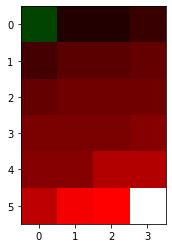

average change: -2.0278 %


  5%|▍         | 23/505 [00:23<08:02,  1.00s/it]

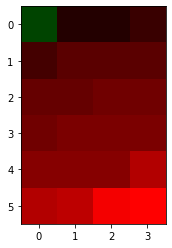

average change: -2.0036 %


  5%|▍         | 24/505 [00:24<08:02,  1.00s/it]

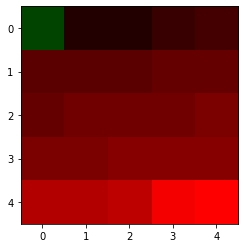

average change: -1.992 %


  5%|▍         | 25/505 [00:25<08:01,  1.00s/it]

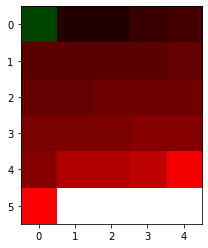

average change: -1.9694 %


  5%|▌         | 26/505 [00:26<08:00,  1.00s/it]

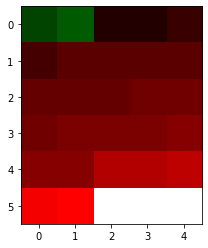

average change: -1.8495000000000001 %


  5%|▌         | 27/505 [00:27<07:59,  1.00s/it]

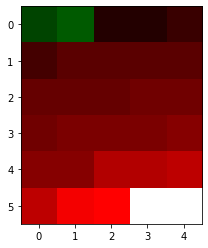

average change: -1.9112 %


  6%|▌         | 28/505 [00:28<07:58,  1.00s/it]

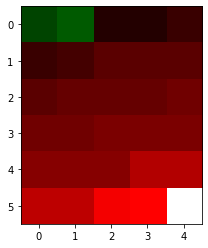

average change: -1.8659 %


  6%|▌         | 29/505 [00:29<07:57,  1.00s/it]

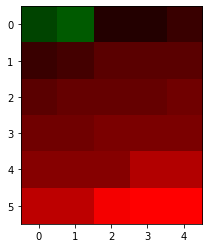

average change: -1.9734999999999998 %


  6%|▌         | 30/505 [00:30<07:56,  1.00s/it]

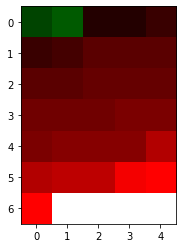

average change: -1.9539 %


  6%|▌         | 31/505 [00:31<07:55,  1.00s/it]

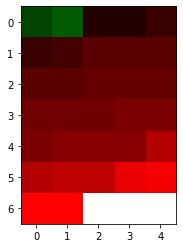

average change: -2.0345 %


  6%|▋         | 32/505 [00:32<07:54,  1.00s/it]

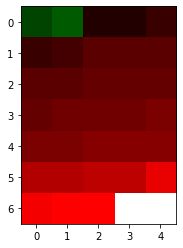

average change: -2.0204 %


  7%|▋         | 33/505 [00:33<07:53,  1.00s/it]

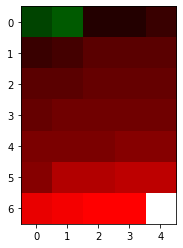

average change: -2.0138 %


  7%|▋         | 34/505 [00:34<07:52,  1.00s/it]

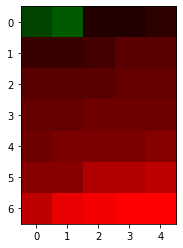

average change: -1.9677 %


  7%|▋         | 35/505 [00:35<07:50,  1.00s/it]

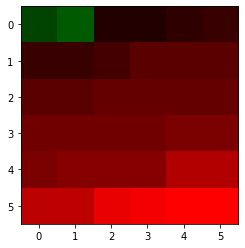

average change: -1.9335000000000002 %


  7%|▋         | 36/505 [00:36<07:50,  1.00s/it]

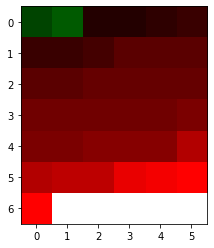

average change: -1.9345999999999999 %


  7%|▋         | 37/505 [00:37<07:49,  1.00s/it]

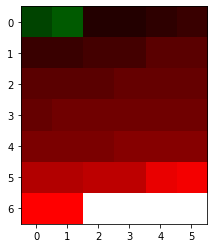

average change: -1.9054000000000002 %


  8%|▊         | 38/505 [00:38<07:48,  1.00s/it]

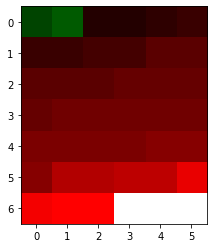

average change: -1.9109 %


  8%|▊         | 39/505 [00:39<07:47,  1.00s/it]

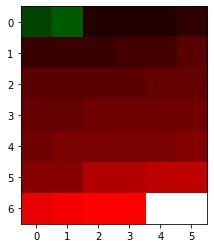

average change: -1.8677 %


  8%|▊         | 40/505 [00:40<07:46,  1.00s/it]

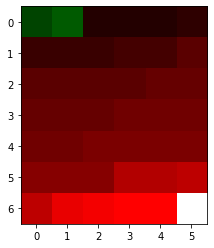

average change: -1.8641999999999999 %


  8%|▊         | 41/505 [00:41<07:44,  1.00s/it]

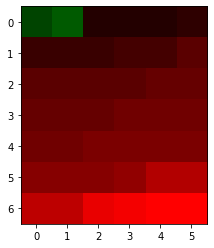

average change: -1.8846999999999998 %


  8%|▊         | 42/505 [00:42<07:44,  1.00s/it]

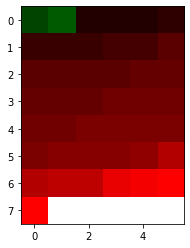

average change: -1.889 %


  9%|▊         | 43/505 [00:43<07:42,  1.00s/it]

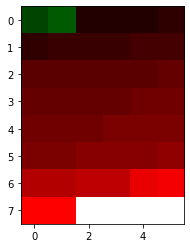

average change: -1.856 %


  9%|▊         | 44/505 [00:44<07:41,  1.00s/it]

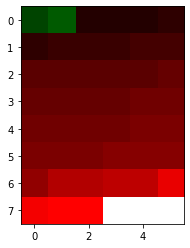

average change: -1.8538999999999999 %


  9%|▉         | 45/505 [00:45<07:40,  1.00s/it]

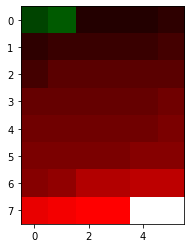

average change: -1.8283 %


  9%|▉         | 46/505 [00:46<07:39,  1.00s/it]

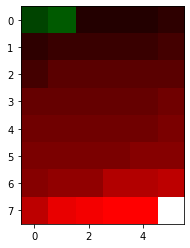

average change: -1.8443999999999998 %


  9%|▉         | 47/505 [00:47<07:38,  1.00s/it]

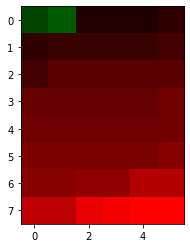

average change: -1.8443999999999998 %


 10%|▉         | 48/505 [00:48<07:37,  1.00s/it]

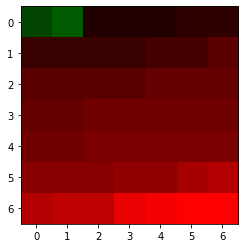

average change: -1.8697 %


 10%|▉         | 49/505 [00:49<07:36,  1.00s/it]

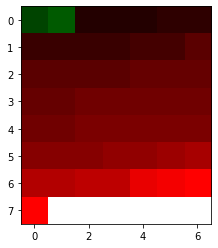

average change: -1.892 %


 10%|▉         | 50/505 [00:50<07:35,  1.00s/it]

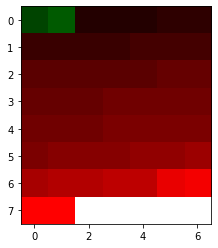

average change: -1.8744 %


 10%|█         | 51/505 [00:51<07:34,  1.00s/it]

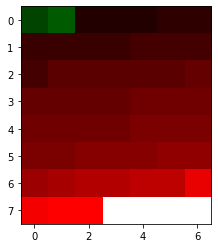

average change: -1.8554000000000002 %


 10%|█         | 52/505 [00:52<07:33,  1.00s/it]

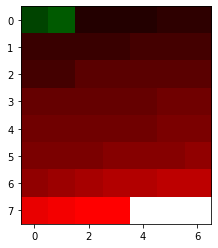

average change: -1.8362 %


 10%|█         | 53/505 [00:53<07:32,  1.00s/it]

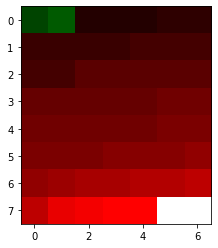

average change: -1.8591 %


 11%|█         | 54/505 [00:54<07:31,  1.00s/it]

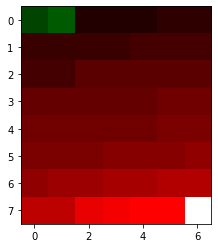

average change: -1.8786 %


 11%|█         | 55/505 [00:55<07:30,  1.00s/it]

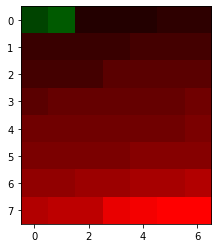

average change: -1.8603999999999998 %


 11%|█         | 56/505 [00:56<07:30,  1.00s/it]

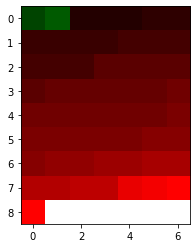

average change: -1.8631000000000002 %


 11%|█▏        | 57/505 [00:57<07:28,  1.00s/it]

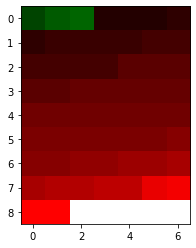

average change: -1.8039 %


 11%|█▏        | 58/505 [00:58<07:28,  1.00s/it]

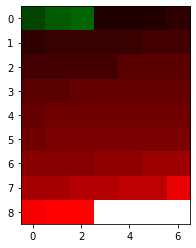

average change: -1.8008 %


 12%|█▏        | 59/505 [00:59<07:26,  1.00s/it]

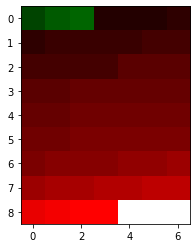

average change: -1.7993 %


 12%|█▏        | 60/505 [01:00<07:26,  1.00s/it]

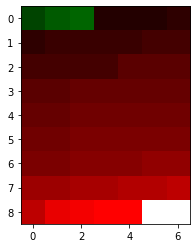

average change: -1.8052 %


 12%|█▏        | 61/505 [01:01<07:25,  1.00s/it]

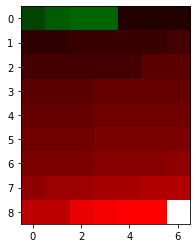

average change: -1.7510000000000001 %


 12%|█▏        | 62/505 [01:02<07:24,  1.00s/it]

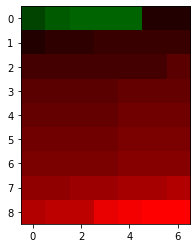

average change: -1.6955999999999998 %


 12%|█▏        | 63/505 [01:03<07:23,  1.00s/it]

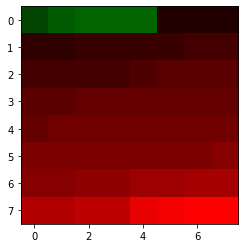

average change: -1.6881 %


 13%|█▎        | 64/505 [01:04<07:22,  1.00s/it]

HTTP Error 404: Not Found


 13%|█▎        | 65/505 [01:05<07:21,  1.00s/it]

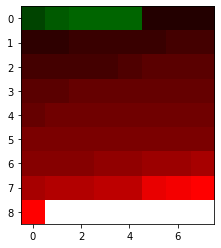

average change: -1.6948999999999999 %


 13%|█▎        | 66/505 [01:06<07:20,  1.00s/it]

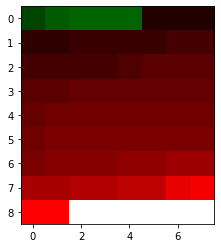

average change: -1.6971 %


 13%|█▎        | 67/505 [01:07<07:19,  1.00s/it]

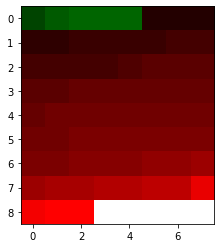

average change: -1.7007 %


 13%|█▎        | 68/505 [01:08<07:18,  1.00s/it]

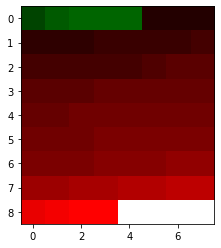

average change: -1.6808 %


 14%|█▎        | 69/505 [01:09<07:17,  1.00s/it]

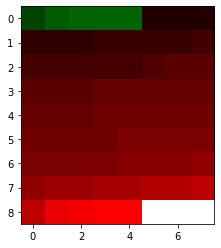

average change: -1.6813000000000002 %


 14%|█▍        | 70/505 [01:10<07:15,  1.00s/it]

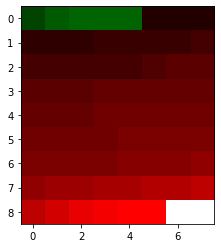

average change: -1.7163000000000002 %


 14%|█▍        | 71/505 [01:11<07:14,  1.00s/it]

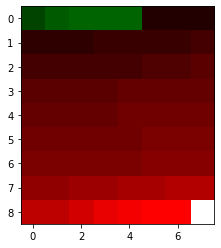

average change: -1.7081 %


 14%|█▍        | 72/505 [01:12<07:13,  1.00s/it]

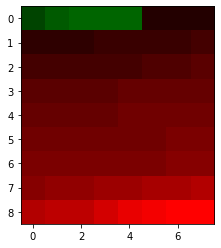

average change: -1.7111 %


 14%|█▍        | 73/505 [01:13<07:13,  1.00s/it]

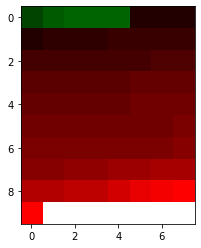

average change: -1.6892999999999998 %


 15%|█▍        | 74/505 [01:14<07:12,  1.00s/it]

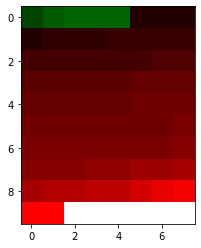

average change: -1.6972999999999998 %


 15%|█▍        | 75/505 [01:15<07:11,  1.00s/it]

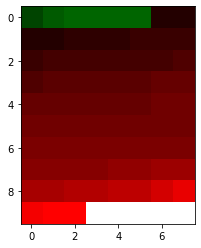

average change: -1.6517 %


 15%|█▌        | 76/505 [01:16<07:10,  1.00s/it]

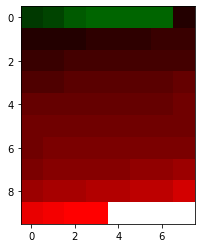

average change: -1.6205 %


 15%|█▌        | 77/505 [01:17<07:08,  1.00s/it]

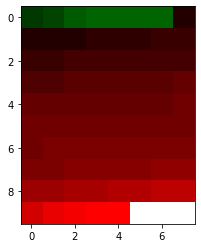

average change: -1.627 %


 15%|█▌        | 78/505 [01:18<07:07,  1.00s/it]

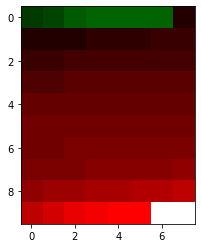

average change: -1.6247 %


 16%|█▌        | 79/505 [01:19<07:07,  1.00s/it]

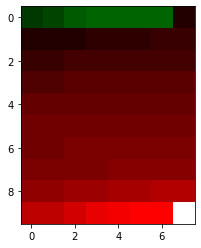

average change: -1.6323 %


 16%|█▌        | 80/505 [01:20<07:06,  1.00s/it]

HTTP Error 404: Not Found


 16%|█▌        | 81/505 [01:21<07:05,  1.00s/it]

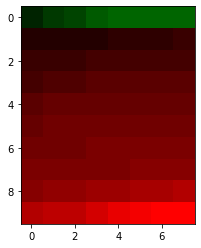

average change: -1.6112000000000002 %


 16%|█▌        | 82/505 [01:22<07:04,  1.00s/it]

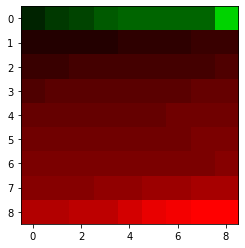

 16%|█▋        | 83/505 [01:23<07:03,  1.00s/it]

average change: -1.5396 %


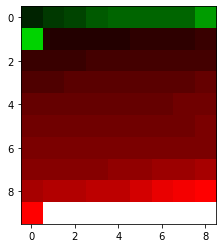

average change: -1.4872 %


 17%|█▋        | 84/505 [01:24<07:02,  1.00s/it]

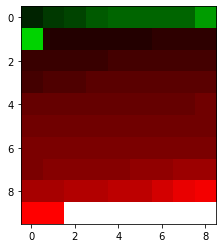

average change: -1.4695 %


 17%|█▋        | 85/505 [01:25<07:01,  1.00s/it]

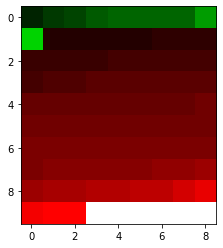

average change: -1.4792 %


 17%|█▋        | 86/505 [01:26<07:00,  1.00s/it]

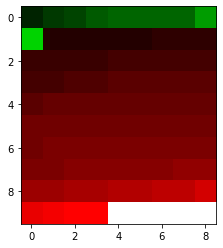

average change: -1.4718 %


 17%|█▋        | 87/505 [01:27<06:59,  1.00s/it]

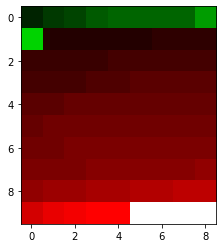

average change: -1.4651 %


 17%|█▋        | 88/505 [01:28<06:58,  1.00s/it]

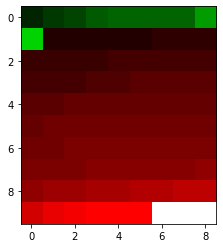

average change: -1.5177 %


 18%|█▊        | 89/505 [01:29<06:57,  1.00s/it]

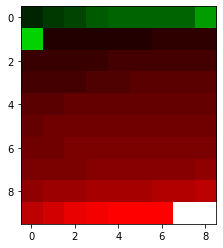

average change: -1.5361 %


 18%|█▊        | 90/505 [01:30<06:55,  1.00s/it]

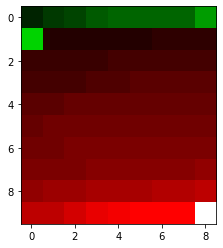

average change: -1.5599999999999998 %


 18%|█▊        | 91/505 [01:31<06:54,  1.00s/it]

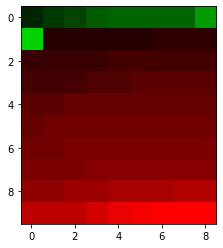

average change: -1.569 %


 18%|█▊        | 92/505 [01:32<06:53,  1.00s/it]

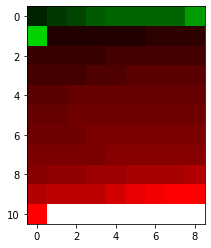

average change: -1.5694 %


 18%|█▊        | 93/505 [01:33<06:53,  1.00s/it]

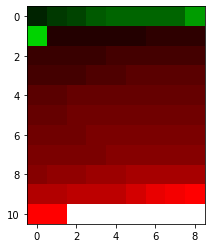

average change: -1.5867 %


 19%|█▊        | 94/505 [01:34<06:52,  1.00s/it]

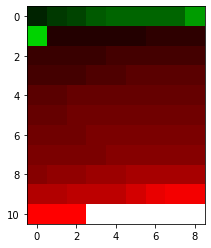

average change: -1.6233000000000002 %


 19%|█▉        | 95/505 [01:35<06:50,  1.00s/it]

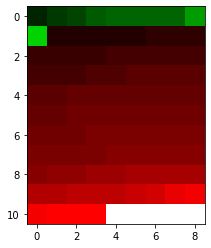

average change: -1.6472 %


 19%|█▉        | 96/505 [01:36<06:49,  1.00s/it]

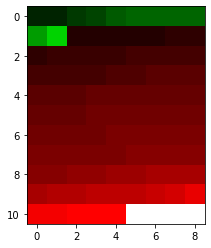

average change: -1.6292999999999997 %


 19%|█▉        | 97/505 [01:37<06:48,  1.00s/it]

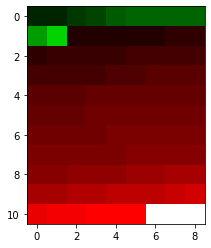

average change: -1.6397 %


 19%|█▉        | 98/505 [01:38<06:47,  1.00s/it]

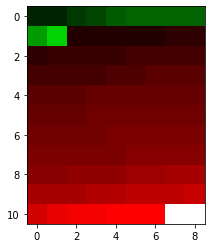

average change: -1.6551 %


 20%|█▉        | 99/505 [01:39<06:46,  1.00s/it]

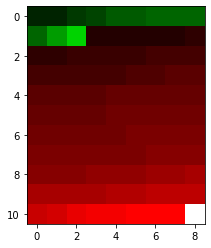

average change: -1.6238 %


 20%|█▉        | 100/505 [01:40<06:45,  1.00s/it]

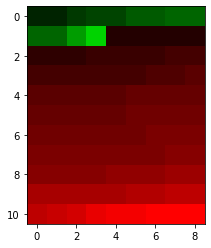

average change: -1.5974 %


 20%|██        | 101/505 [01:41<06:44,  1.00s/it]

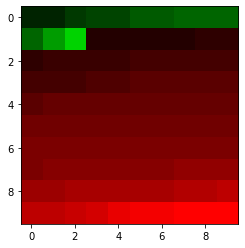

average change: -1.6025999999999998 %


 20%|██        | 102/505 [01:42<06:43,  1.00s/it]

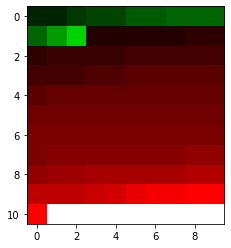

average change: -1.6102999999999998 %


 20%|██        | 103/505 [01:43<06:42,  1.00s/it]

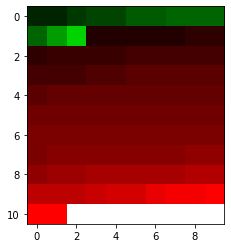

average change: -1.6356 %


 21%|██        | 104/505 [01:44<06:41,  1.00s/it]

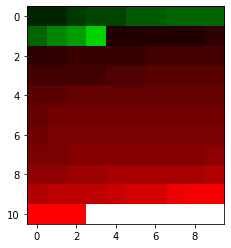

average change: -1.5963 %


 21%|██        | 105/505 [01:45<06:41,  1.00s/it]

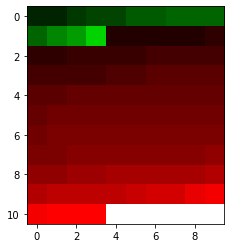

average change: -1.6153 %


 21%|██        | 106/505 [01:46<06:39,  1.00s/it]

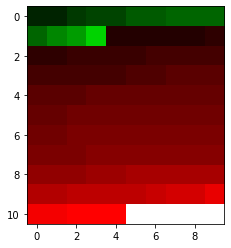

average change: -1.6081 %


 21%|██        | 107/505 [01:47<06:38,  1.00s/it]

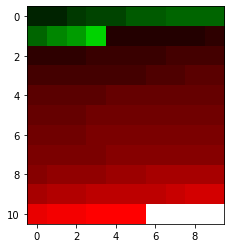

average change: -1.5972 %


 21%|██▏       | 108/505 [01:48<06:38,  1.00s/it]

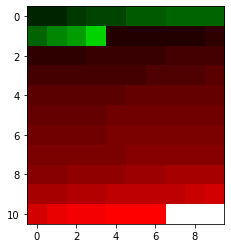

average change: -1.5932000000000002 %


 22%|██▏       | 109/505 [01:49<06:37,  1.00s/it]

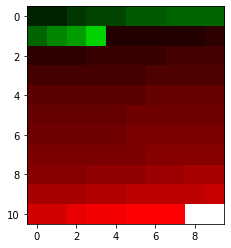

average change: -1.5896000000000001 %


 22%|██▏       | 110/505 [01:50<06:36,  1.00s/it]

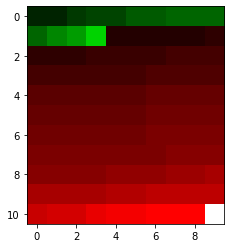

average change: -1.5901999999999998 %


 22%|██▏       | 111/505 [01:51<06:35,  1.00s/it]

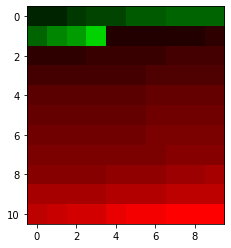

average change: -1.6057 %


 22%|██▏       | 112/505 [01:52<06:33,  1.00s/it]

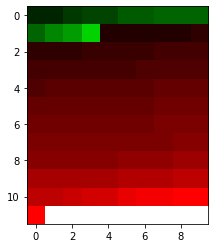

average change: -1.6007 %


 22%|██▏       | 113/505 [01:53<06:32,  1.00s/it]

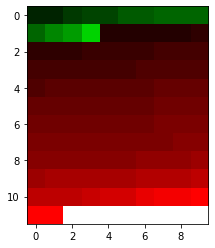

average change: -1.6078999999999999 %


 23%|██▎       | 114/505 [01:54<06:31,  1.00s/it]

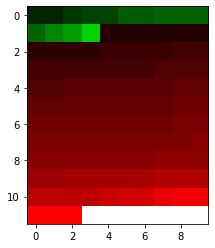

average change: -1.5947 %


 23%|██▎       | 115/505 [01:55<06:31,  1.00s/it]

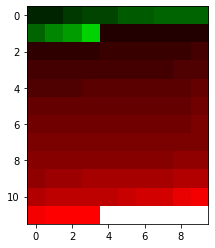

average change: -1.5862 %


 23%|██▎       | 116/505 [01:56<06:30,  1.00s/it]

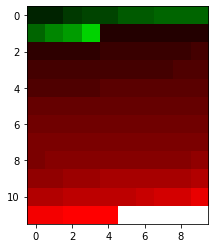

average change: -1.5826 %


 23%|██▎       | 117/505 [01:57<06:29,  1.00s/it]

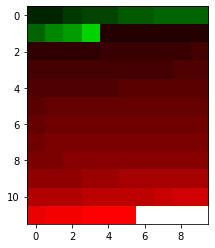

average change: -1.5778 %


 23%|██▎       | 118/505 [01:58<06:27,  1.00s/it]

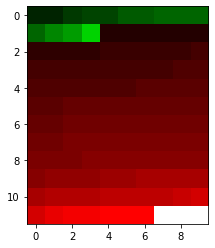

average change: -1.5735 %


 24%|██▎       | 119/505 [01:59<06:26,  1.00s/it]

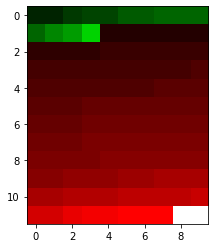

average change: -1.5663 %


 24%|██▍       | 120/505 [02:00<06:25,  1.00s/it]

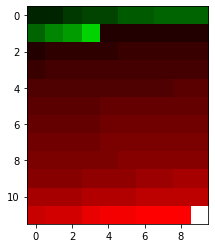

average change: -1.5553000000000001 %


 24%|██▍       | 121/505 [02:01<06:24,  1.00s/it]

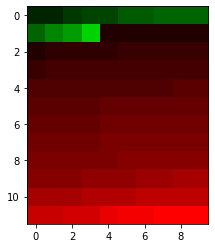

average change: -1.5744 %


 24%|██▍       | 122/505 [02:02<06:24,  1.00s/it]

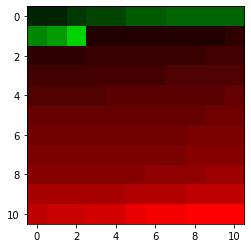

average change: -1.5809 %


 24%|██▍       | 123/505 [02:03<06:23,  1.00s/it]

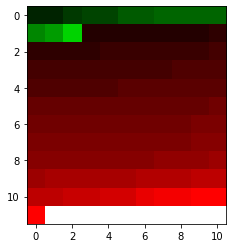

average change: -1.5703000000000003 %


 25%|██▍       | 124/505 [02:04<06:22,  1.00s/it]

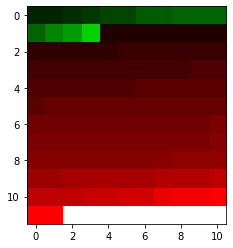

average change: -1.5539 %


 25%|██▍       | 125/505 [02:05<06:21,  1.00s/it]

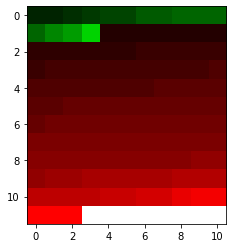

average change: -1.5446 %


 25%|██▍       | 126/505 [02:06<06:20,  1.00s/it]

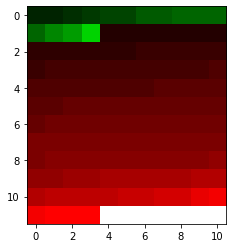

average change: -1.5488 %


 25%|██▌       | 127/505 [02:07<06:19,  1.00s/it]

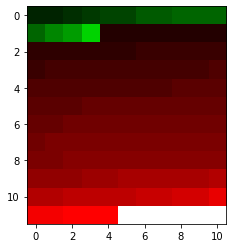

average change: -1.5447 %


 25%|██▌       | 128/505 [02:08<06:18,  1.00s/it]

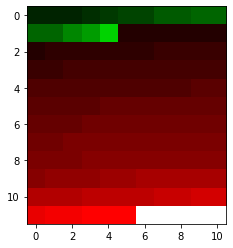

average change: -1.5310000000000001 %


 26%|██▌       | 129/505 [02:09<06:17,  1.00s/it]

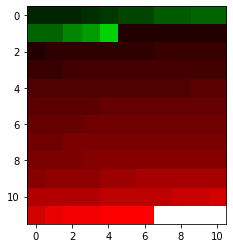

average change: -1.5444 %


 26%|██▌       | 130/505 [02:10<06:16,  1.00s/it]

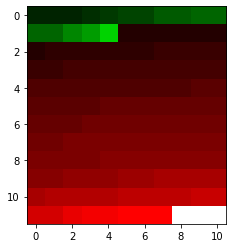

average change: -1.5492000000000001 %


 26%|██▌       | 131/505 [02:11<06:14,  1.00s/it]

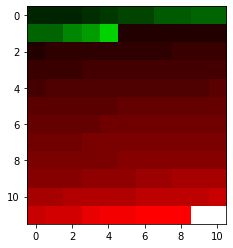

average change: -1.5408 %


 26%|██▌       | 132/505 [02:12<06:13,  1.00s/it]

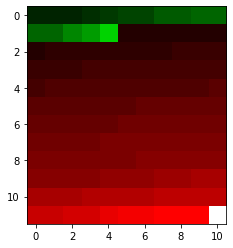

average change: -1.5396 %


 26%|██▋       | 133/505 [02:13<06:12,  1.00s/it]

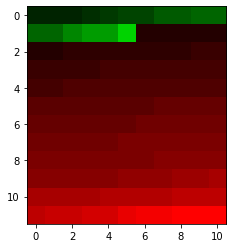

average change: -1.5056 %


 27%|██▋       | 134/505 [02:14<06:11,  1.00s/it]

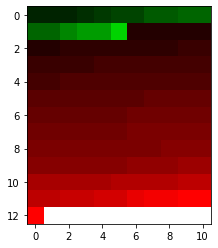

average change: -1.508 %


 27%|██▋       | 135/505 [02:15<06:11,  1.00s/it]

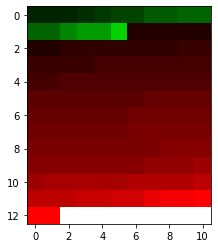

average change: -1.5151 %


 27%|██▋       | 136/505 [02:16<06:10,  1.00s/it]

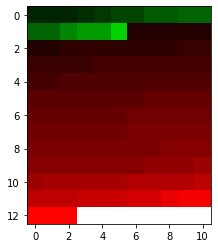

average change: -1.5328 %


 27%|██▋       | 137/505 [02:17<06:09,  1.00s/it]

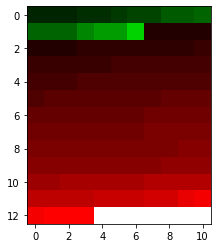

average change: -1.5191 %


 27%|██▋       | 138/505 [02:18<06:08,  1.00s/it]

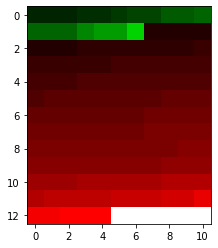

average change: -1.5283 %


 28%|██▊       | 139/505 [02:19<06:07,  1.00s/it]

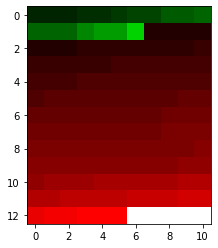

average change: -1.5276 %


 28%|██▊       | 140/505 [02:20<06:05,  1.00s/it]

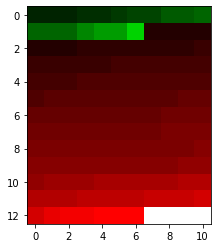

average change: -1.5413 %


 28%|██▊       | 141/505 [02:21<06:04,  1.00s/it]

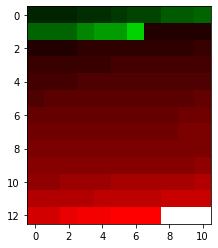

average change: -1.54 %


 28%|██▊       | 142/505 [02:22<06:03,  1.00s/it]

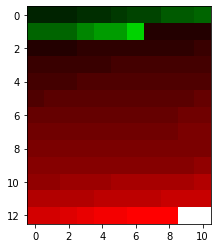

average change: -1.5608 %


 28%|██▊       | 143/505 [02:23<06:02,  1.00s/it]

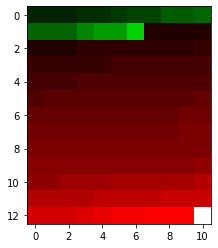

average change: -1.5789000000000002 %


 29%|██▊       | 144/505 [02:24<06:01,  1.00s/it]

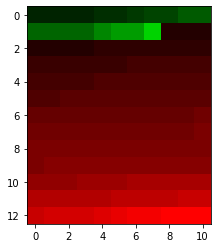

average change: -1.5675000000000001 %


 29%|██▊       | 145/505 [02:25<06:01,  1.00s/it]

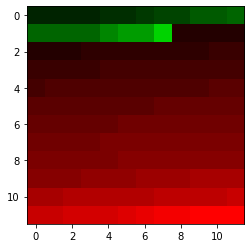

average change: -1.5449 %


 29%|██▉       | 146/505 [02:26<06:00,  1.00s/it]

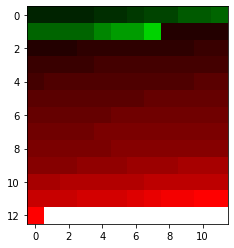

average change: -1.5601 %


 29%|██▉       | 147/505 [02:27<05:59,  1.00s/it]

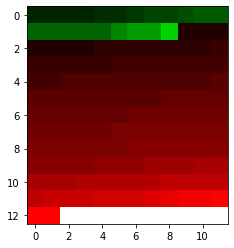

average change: -1.5412000000000001 %


 29%|██▉       | 148/505 [02:28<05:57,  1.00s/it]

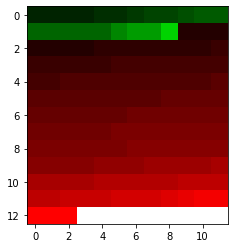

average change: -1.55 %


 30%|██▉       | 149/505 [02:29<05:56,  1.00s/it]

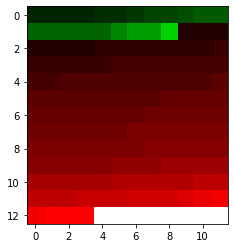

average change: -1.5507 %


 30%|██▉       | 150/505 [02:30<05:55,  1.00s/it]

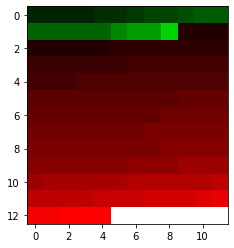

average change: -1.542 %


 30%|██▉       | 151/505 [02:31<05:54,  1.00s/it]

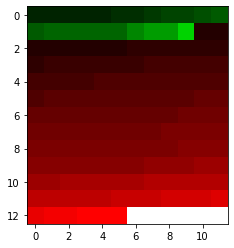

average change: -1.5312 %


 30%|███       | 152/505 [02:32<05:53,  1.00s/it]

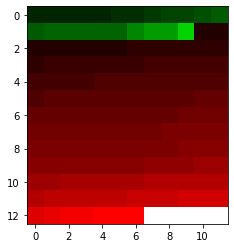

average change: -1.5436 %


 30%|███       | 153/505 [02:33<05:52,  1.00s/it]

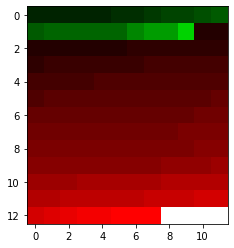

average change: -1.543 %


 30%|███       | 154/505 [02:34<05:51,  1.00s/it]

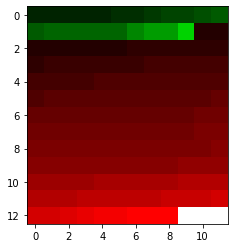

average change: -1.5455 %


 31%|███       | 155/505 [02:35<05:50,  1.00s/it]

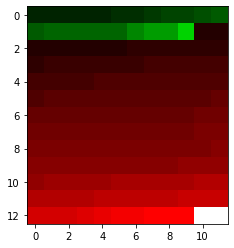

average change: -1.5521 %


 31%|███       | 156/505 [02:36<05:49,  1.00s/it]

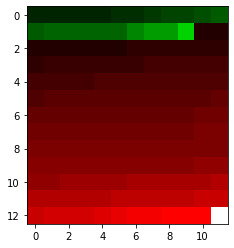

average change: -1.5558 %


 31%|███       | 157/505 [02:37<05:48,  1.00s/it]

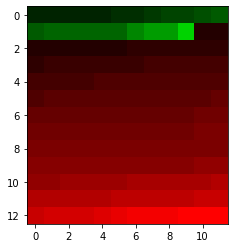

average change: -1.5764 %


 31%|███▏      | 158/505 [02:38<05:47,  1.00s/it]

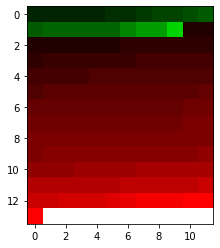

average change: -1.5795 %


 31%|███▏      | 159/505 [02:39<05:46,  1.00s/it]

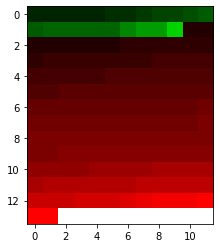

average change: -1.5729 %


 32%|███▏      | 160/505 [02:40<05:45,  1.00s/it]

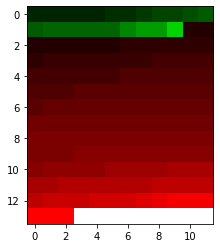

average change: -1.5689000000000002 %


 32%|███▏      | 161/505 [02:41<05:45,  1.00s/it]

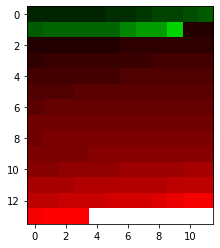

average change: -1.5701 %


 32%|███▏      | 162/505 [02:42<05:43,  1.00s/it]

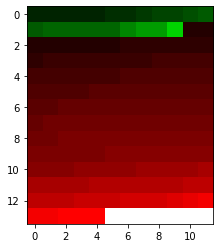

average change: -1.5671000000000002 %


 32%|███▏      | 163/505 [02:43<05:42,  1.00s/it]

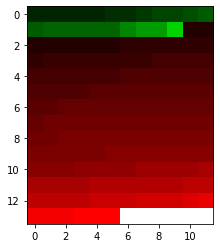

average change: -1.5800999999999998 %


 32%|███▏      | 164/505 [02:44<05:41,  1.00s/it]

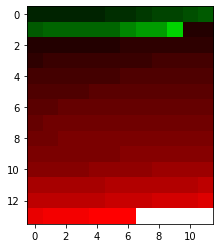

average change: -1.5827999999999998 %


 33%|███▎      | 165/505 [02:45<05:41,  1.00s/it]

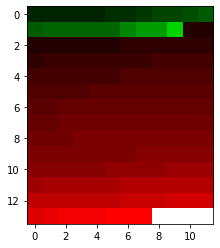

average change: -1.5833 %


 33%|███▎      | 166/505 [02:46<05:40,  1.00s/it]

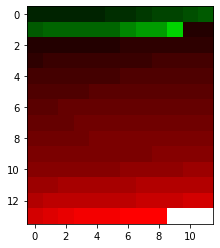

average change: -1.5836 %


 33%|███▎      | 167/505 [02:47<05:39,  1.00s/it]

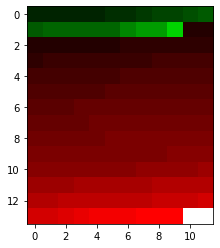

average change: -1.5802 %


 33%|███▎      | 168/505 [02:48<05:38,  1.00s/it]

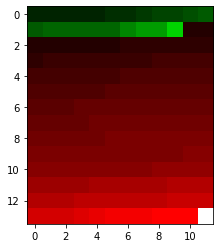

average change: -1.583 %


 33%|███▎      | 169/505 [02:49<05:37,  1.00s/it]

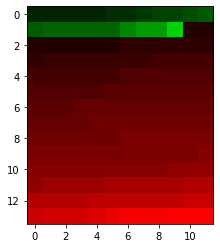

average change: -1.5841 %


 34%|███▎      | 170/505 [02:50<05:36,  1.00s/it]

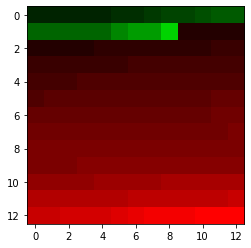

average change: -1.5782 %


 34%|███▍      | 171/505 [02:51<05:35,  1.00s/it]

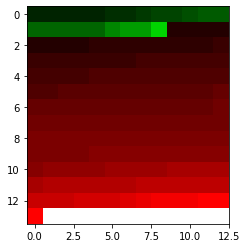

average change: -1.5706000000000002 %


 34%|███▍      | 172/505 [02:52<05:34,  1.00s/it]

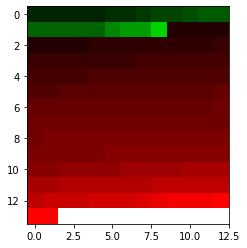

average change: -1.5730000000000002 %


 34%|███▍      | 173/505 [02:53<05:32,  1.00s/it]

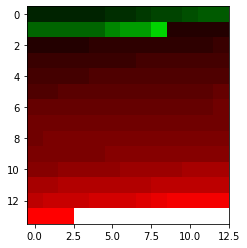

average change: -1.5921 %


 34%|███▍      | 174/505 [02:54<05:31,  1.00s/it]

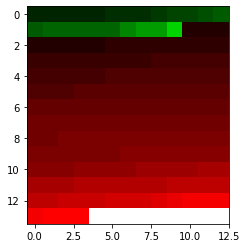

average change: -1.5814000000000001 %


 35%|███▍      | 175/505 [02:55<05:30,  1.00s/it]

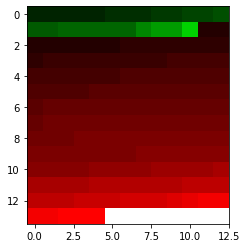

average change: -1.5681 %


 35%|███▍      | 176/505 [02:56<05:30,  1.00s/it]

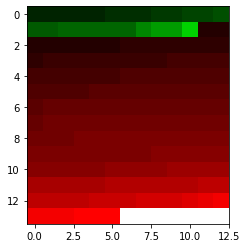

average change: -1.5709 %


 35%|███▌      | 177/505 [02:57<05:29,  1.01s/it]

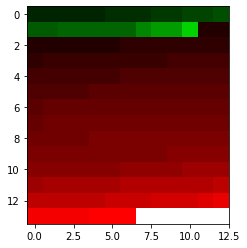

average change: -1.5731 %


 35%|███▌      | 178/505 [02:58<05:28,  1.00s/it]

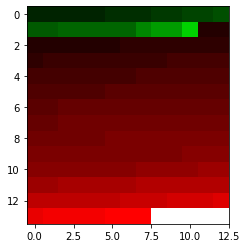

average change: -1.5696999999999999 %


 35%|███▌      | 179/505 [02:59<05:27,  1.00s/it]

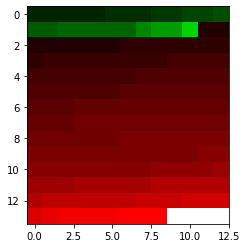

average change: -1.5668000000000002 %


 36%|███▌      | 180/505 [03:00<05:26,  1.00s/it]

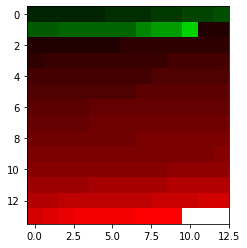

average change: -1.5624 %


 36%|███▌      | 181/505 [03:01<05:24,  1.00s/it]

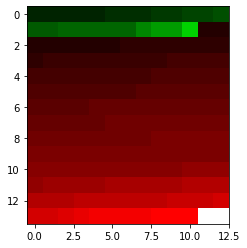

average change: -1.5626999999999998 %


 36%|███▌      | 182/505 [03:02<05:23,  1.00s/it]

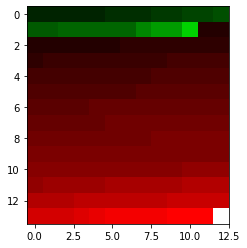

average change: -1.576 %


 36%|███▌      | 183/505 [03:03<05:22,  1.00s/it]

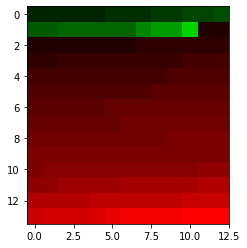

average change: -1.5682 %


 36%|███▋      | 184/505 [03:04<05:21,  1.00s/it]

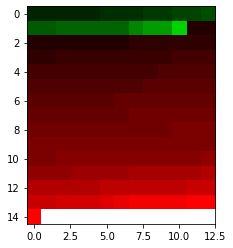

average change: -1.5667 %


 37%|███▋      | 185/505 [03:05<05:20,  1.00s/it]

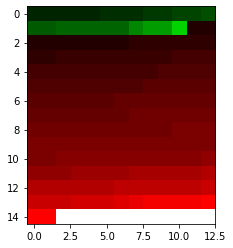

average change: -1.5758999999999999 %


 37%|███▋      | 186/505 [03:06<05:19,  1.00s/it]

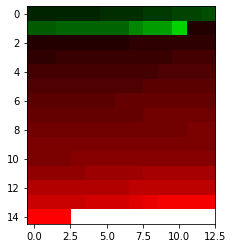

average change: -1.5762000000000003 %


 37%|███▋      | 187/505 [03:07<05:18,  1.00s/it]

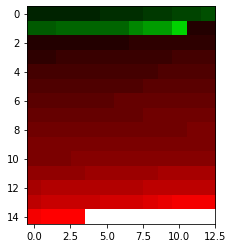

average change: -1.5836 %


 37%|███▋      | 188/505 [03:08<05:17,  1.00s/it]

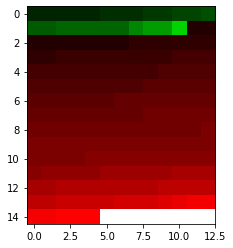

average change: -1.5851 %


 37%|███▋      | 189/505 [03:09<05:16,  1.00s/it]

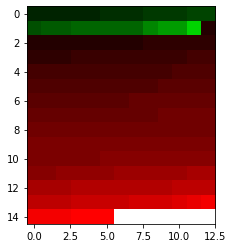

average change: -1.5735 %


 38%|███▊      | 190/505 [03:10<05:15,  1.00s/it]

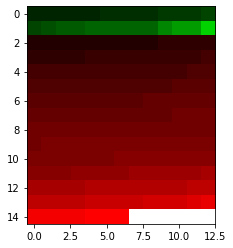

average change: -1.5630000000000002 %


 38%|███▊      | 191/505 [03:11<05:14,  1.00s/it]

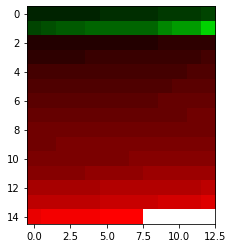

average change: -1.562 %


 38%|███▊      | 192/505 [03:12<05:13,  1.00s/it]

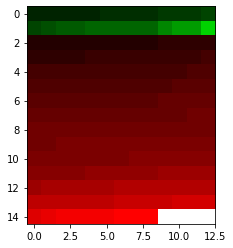

average change: -1.5672 %


 38%|███▊      | 193/505 [03:13<05:12,  1.00s/it]

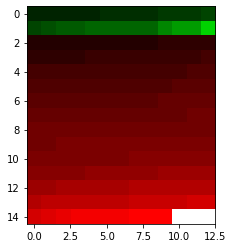

average change: -1.5737 %


 38%|███▊      | 194/505 [03:14<05:11,  1.00s/it]

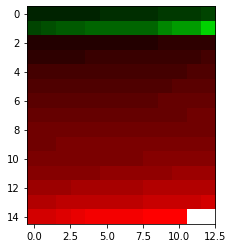

average change: -1.5765999999999998 %


 39%|███▊      | 195/505 [03:15<05:10,  1.00s/it]

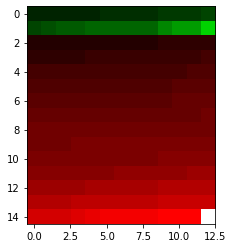

average change: -1.5755000000000001 %


 39%|███▉      | 196/505 [03:16<05:09,  1.00s/it]

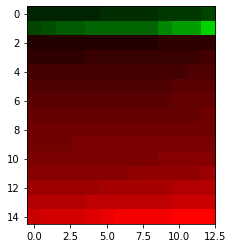

average change: -1.5796999999999999 %


 39%|███▉      | 197/505 [03:17<05:08,  1.00s/it]

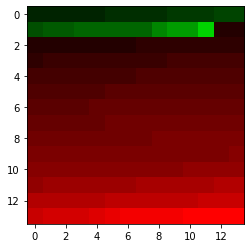

average change: -1.6004999999999998 %


 39%|███▉      | 198/505 [03:18<05:07,  1.00s/it]

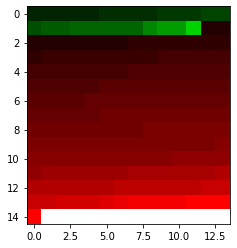

average change: -1.6088000000000002 %


 39%|███▉      | 199/505 [03:19<05:06,  1.00s/it]

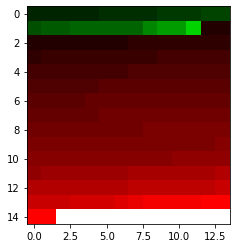

average change: -1.6176 %


 40%|███▉      | 200/505 [03:20<05:05,  1.00s/it]

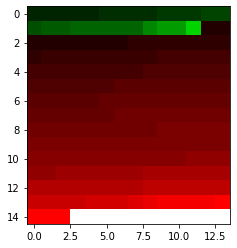

average change: -1.6143999999999998 %


 40%|███▉      | 201/505 [03:21<05:04,  1.00s/it]

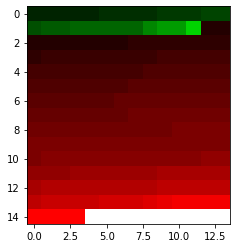

average change: -1.6117 %


 40%|████      | 202/505 [03:22<05:03,  1.00s/it]

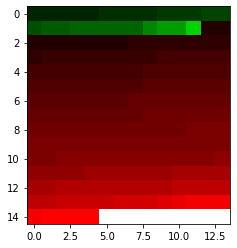

average change: -1.6098000000000001 %


 40%|████      | 203/505 [03:23<05:02,  1.00s/it]

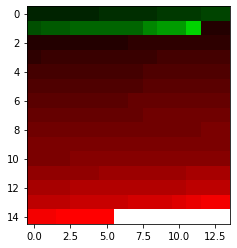

average change: -1.6117 %


 40%|████      | 204/505 [03:24<05:01,  1.00s/it]

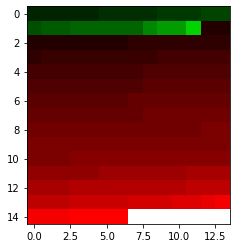

average change: -1.6251000000000002 %


 41%|████      | 205/505 [03:25<05:00,  1.00s/it]

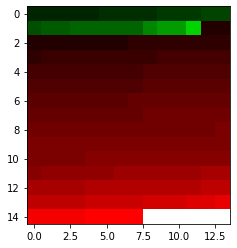

average change: -1.6259 %


 41%|████      | 206/505 [03:26<04:59,  1.00s/it]

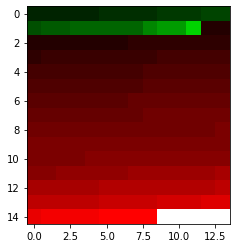

average change: -1.6296000000000002 %


 41%|████      | 207/505 [03:27<04:58,  1.00s/it]

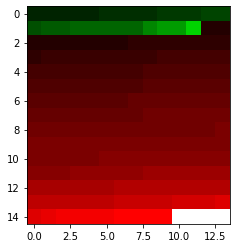

average change: -1.6316000000000002 %


 41%|████      | 208/505 [03:28<04:57,  1.00s/it]

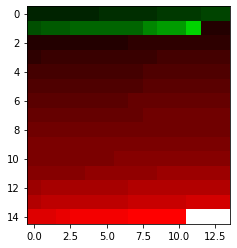

average change: -1.6332 %


 41%|████▏     | 209/505 [03:29<04:56,  1.00s/it]

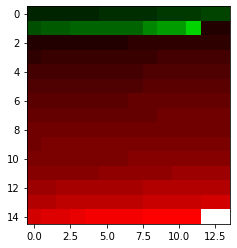

average change: -1.6330999999999998 %


 42%|████▏     | 210/505 [03:30<04:55,  1.00s/it]

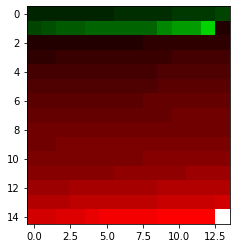

average change: -1.6241999999999999 %


 42%|████▏     | 211/505 [03:31<04:55,  1.00s/it]

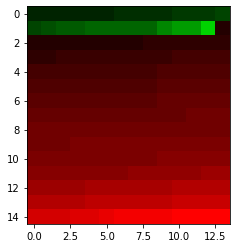

average change: -1.6228 %


 42%|████▏     | 212/505 [03:32<04:54,  1.00s/it]

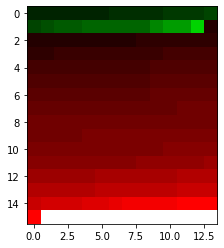

average change: -1.6237000000000001 %


 42%|████▏     | 213/505 [03:33<04:53,  1.00s/it]

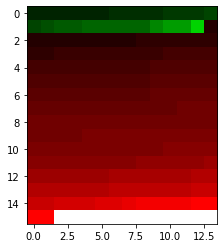

average change: -1.6294 %


 42%|████▏     | 214/505 [03:34<04:51,  1.00s/it]

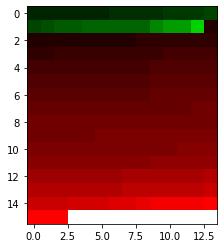

average change: -1.6292 %


 43%|████▎     | 215/505 [03:35<04:50,  1.00s/it]

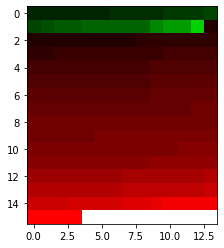

average change: -1.6406 %


 43%|████▎     | 216/505 [03:36<04:49,  1.00s/it]

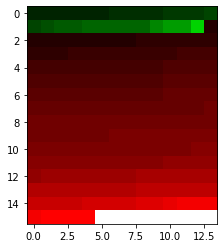

average change: -1.6341 %


 43%|████▎     | 217/505 [03:37<04:48,  1.00s/it]

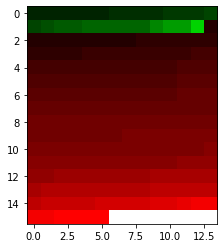

average change: -1.6281 %


 43%|████▎     | 218/505 [03:38<04:47,  1.00s/it]

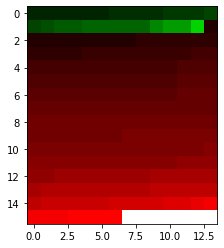

average change: -1.6383999999999999 %


 43%|████▎     | 219/505 [03:39<04:46,  1.00s/it]

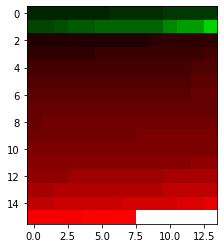

average change: -1.6281 %


 44%|████▎     | 220/505 [03:40<04:45,  1.00s/it]

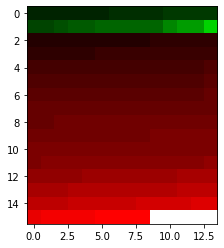

average change: -1.624 %


 44%|████▍     | 221/505 [03:41<04:45,  1.00s/it]

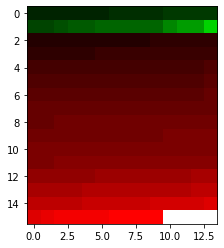

average change: -1.625 %


 44%|████▍     | 222/505 [03:42<04:44,  1.00s/it]

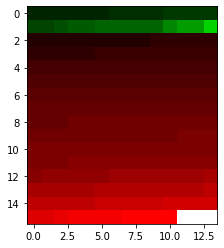

average change: -1.6214 %


 44%|████▍     | 223/505 [03:43<04:42,  1.00s/it]

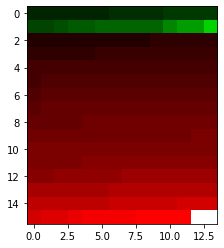

average change: -1.6181 %


 44%|████▍     | 224/505 [03:44<04:42,  1.00s/it]

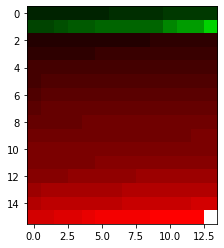

average change: -1.6202 %


 45%|████▍     | 225/505 [03:45<04:41,  1.00s/it]

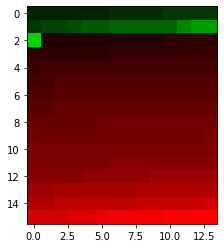

average change: -1.6098000000000001 %


 45%|████▍     | 226/505 [03:46<04:40,  1.00s/it]

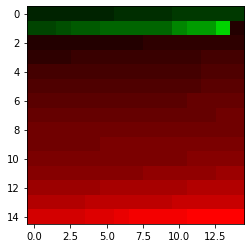

average change: -1.6081 %


 45%|████▍     | 227/505 [03:47<04:38,  1.00s/it]

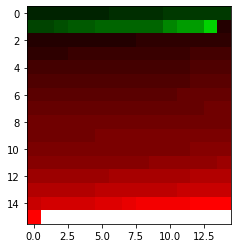

average change: -1.6107 %


 45%|████▌     | 228/505 [03:48<04:37,  1.00s/it]

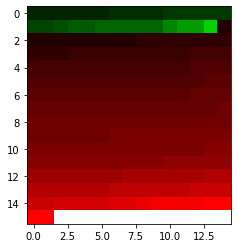

average change: -1.6081999999999999 %


 45%|████▌     | 229/505 [03:49<04:37,  1.01s/it]

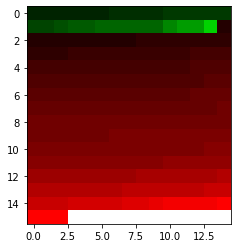

average change: -1.6136000000000001 %


 46%|████▌     | 230/505 [03:50<04:36,  1.00s/it]

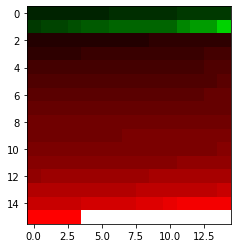

average change: -1.6045 %


 46%|████▌     | 231/505 [03:51<04:35,  1.00s/it]

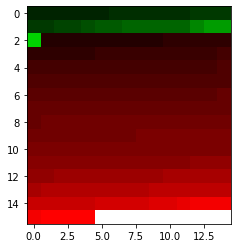

average change: -1.5963999999999998 %


 46%|████▌     | 232/505 [03:52<04:34,  1.00s/it]

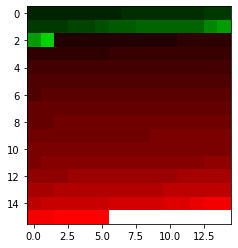

average change: -1.5892 %


 46%|████▌     | 233/505 [03:53<04:33,  1.00s/it]

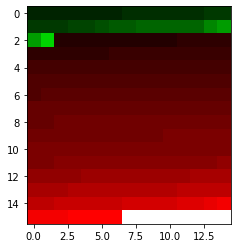

average change: -1.5904999999999998 %


 46%|████▋     | 234/505 [03:54<04:32,  1.00s/it]

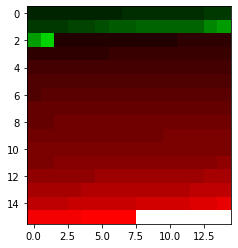

average change: -1.5947 %


 47%|████▋     | 235/505 [03:55<04:30,  1.00s/it]

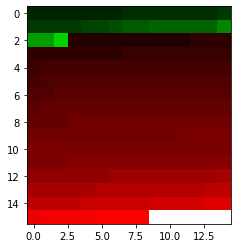

average change: -1.5858 %


 47%|████▋     | 236/505 [03:56<04:29,  1.00s/it]

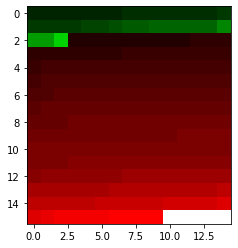

average change: -1.5895 %


 47%|████▋     | 237/505 [03:57<04:28,  1.00s/it]

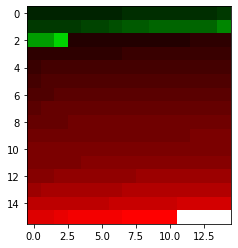

average change: -1.5911000000000002 %


 47%|████▋     | 238/505 [03:58<04:27,  1.00s/it]

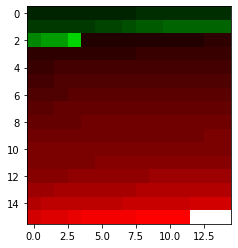

average change: -1.5835 %


 47%|████▋     | 239/505 [03:59<04:26,  1.00s/it]

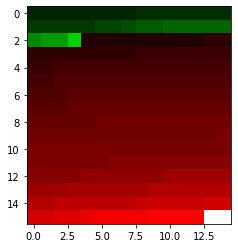

average change: -1.5824999999999998 %


 48%|████▊     | 240/505 [04:00<04:25,  1.00s/it]

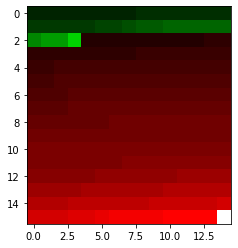

average change: -1.5831000000000002 %


 48%|████▊     | 241/505 [04:01<04:24,  1.00s/it]

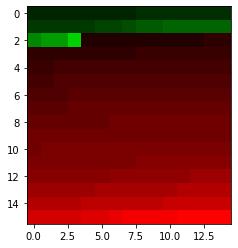

average change: -1.5841999999999998 %


 48%|████▊     | 242/505 [04:02<04:23,  1.00s/it]

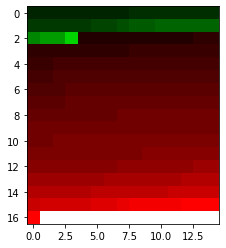

average change: -1.5841999999999998 %


 48%|████▊     | 243/505 [04:03<04:22,  1.00s/it]

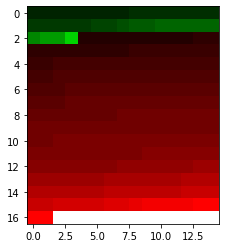

average change: -1.5915 %


 48%|████▊     | 244/505 [04:04<04:21,  1.00s/it]

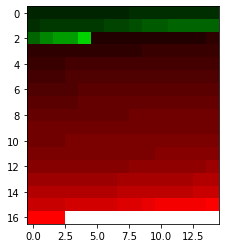

average change: -1.5838 %


 49%|████▊     | 245/505 [04:05<04:20,  1.00s/it]

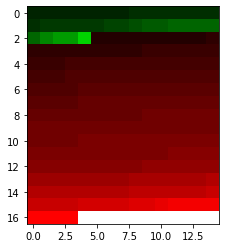

average change: -1.5843 %


 49%|████▊     | 246/505 [04:06<04:19,  1.00s/it]

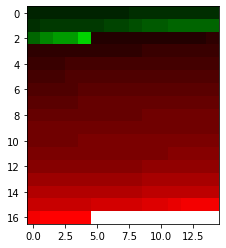

average change: -1.5895 %


 49%|████▉     | 247/505 [04:07<04:18,  1.00s/it]

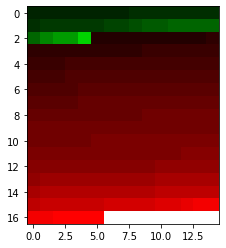

average change: -1.5906 %


 49%|████▉     | 248/505 [04:08<04:17,  1.00s/it]

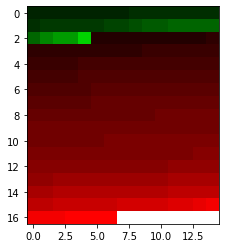

average change: -1.5868 %


 49%|████▉     | 249/505 [04:09<04:16,  1.00s/it]

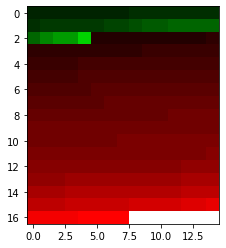

average change: -1.5862 %


 50%|████▉     | 250/505 [04:10<04:15,  1.00s/it]

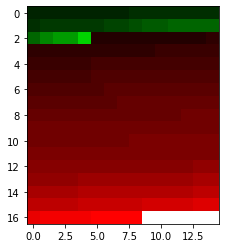

average change: -1.5809 %


 50%|████▉     | 251/505 [04:11<04:14,  1.00s/it]

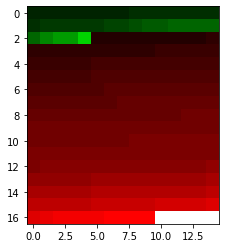

average change: -1.5827999999999998 %


 50%|████▉     | 252/505 [04:12<04:13,  1.00s/it]

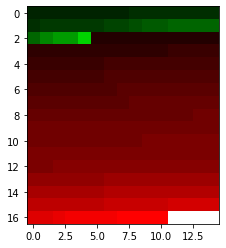

average change: -1.5768 %


 50%|█████     | 253/505 [04:13<04:12,  1.00s/it]

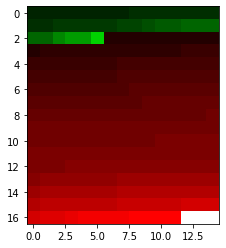

average change: -1.5687 %


 50%|█████     | 254/505 [04:14<04:11,  1.00s/it]

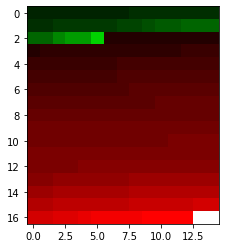

average change: -1.5684 %


 50%|█████     | 255/505 [04:15<04:10,  1.00s/it]

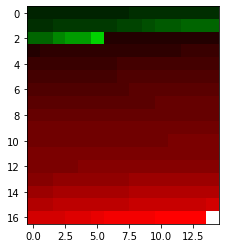

average change: -1.5774 %


 51%|█████     | 256/505 [04:16<04:09,  1.00s/it]

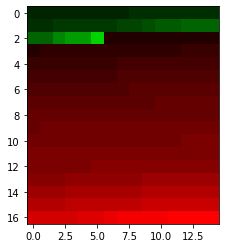

average change: -1.5776999999999999 %


 51%|█████     | 257/505 [04:17<04:08,  1.00s/it]

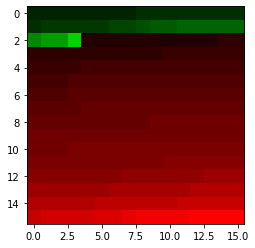

average change: -1.5725 %


 51%|█████     | 258/505 [04:19<04:07,  1.00s/it]

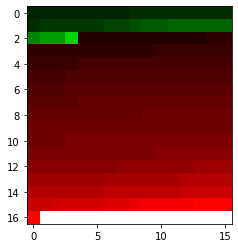

average change: -1.5795 %


 51%|█████▏    | 259/505 [04:20<04:06,  1.00s/it]

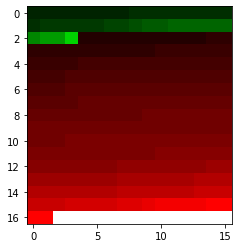

average change: -1.5836 %


 51%|█████▏    | 260/505 [04:21<04:05,  1.00s/it]

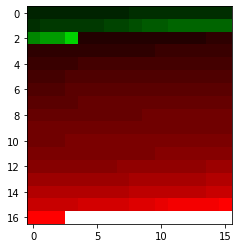

average change: -1.5886999999999998 %


 52%|█████▏    | 261/505 [04:22<04:04,  1.00s/it]

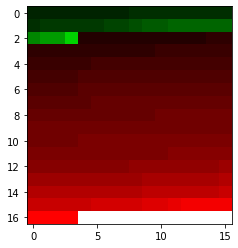

average change: -1.5851 %


 52%|█████▏    | 262/505 [04:23<04:03,  1.00s/it]

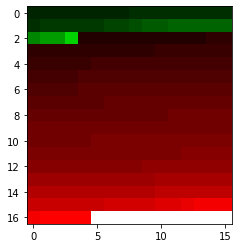

average change: -1.5845000000000002 %


 52%|█████▏    | 263/505 [04:24<04:02,  1.00s/it]

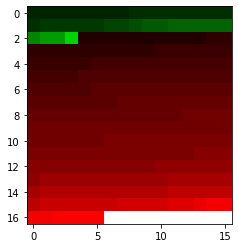

average change: -1.5824 %


 52%|█████▏    | 264/505 [04:25<04:01,  1.00s/it]

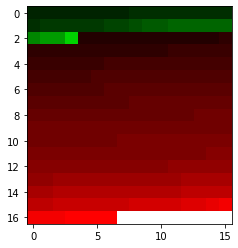

average change: -1.5771 %


 52%|█████▏    | 265/505 [04:26<04:00,  1.00s/it]

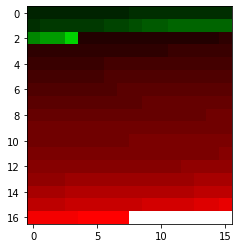

average change: -1.5744 %


 53%|█████▎    | 266/505 [04:27<03:59,  1.00s/it]

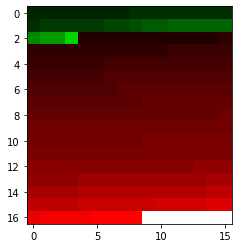

average change: -1.5751000000000002 %


 53%|█████▎    | 267/505 [04:28<03:58,  1.00s/it]

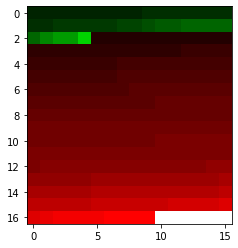

average change: -1.569 %


 53%|█████▎    | 268/505 [04:29<03:57,  1.00s/it]

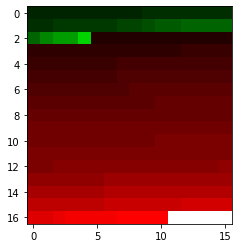

average change: -1.5711 %


 53%|█████▎    | 269/505 [04:30<03:56,  1.00s/it]

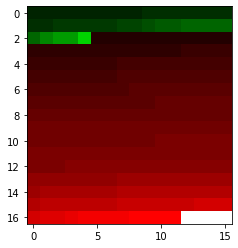

average change: -1.5730000000000002 %


 53%|█████▎    | 270/505 [04:31<03:55,  1.00s/it]

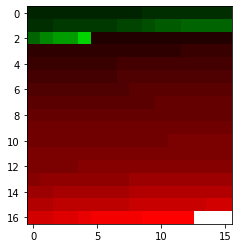

average change: -1.574 %


 54%|█████▎    | 271/505 [04:32<03:54,  1.00s/it]

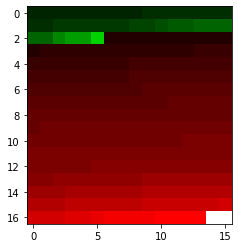

average change: -1.5661999999999998 %


 54%|█████▍    | 272/505 [04:33<03:53,  1.00s/it]

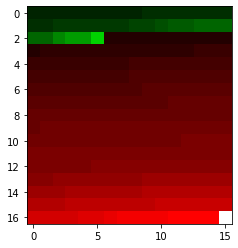

average change: -1.5737 %


 54%|█████▍    | 273/505 [04:34<03:52,  1.00s/it]

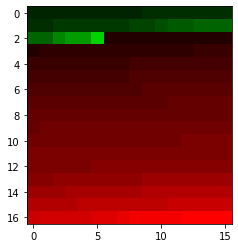

average change: -1.5800999999999998 %


 54%|█████▍    | 274/505 [04:35<03:51,  1.00s/it]

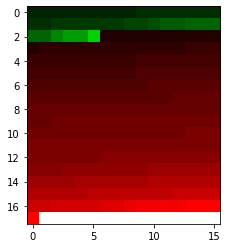

average change: -1.5768 %


 54%|█████▍    | 275/505 [04:36<03:50,  1.00s/it]

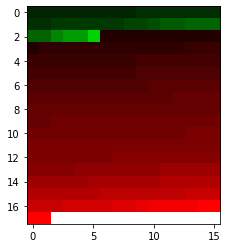

average change: -1.5786000000000002 %


 55%|█████▍    | 276/505 [04:37<03:49,  1.00s/it]

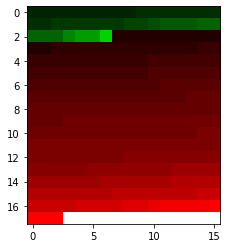

average change: -1.5678999999999998 %


 55%|█████▍    | 277/505 [04:38<03:48,  1.00s/it]

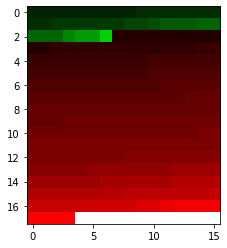

average change: -1.5744 %


 55%|█████▌    | 278/505 [04:39<03:47,  1.00s/it]

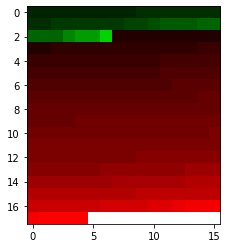

average change: -1.5713000000000001 %


 55%|█████▌    | 279/505 [04:40<03:46,  1.00s/it]

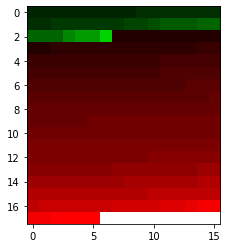

average change: -1.5698 %


 55%|█████▌    | 280/505 [04:41<03:45,  1.00s/it]

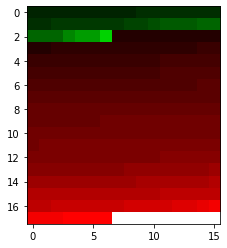

average change: -1.5685 %


 56%|█████▌    | 281/505 [04:42<03:44,  1.00s/it]

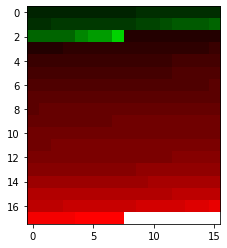

average change: -1.5603 %


 56%|█████▌    | 282/505 [04:43<03:43,  1.00s/it]

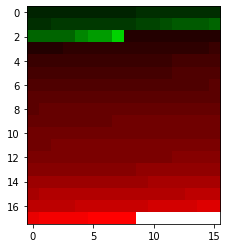

average change: -1.5657999999999999 %


 56%|█████▌    | 283/505 [04:44<03:42,  1.00s/it]

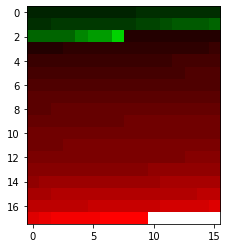

average change: -1.5630000000000002 %


 56%|█████▌    | 284/505 [04:45<03:41,  1.00s/it]

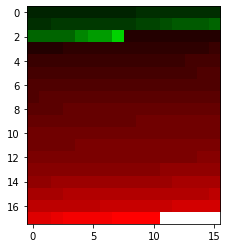

average change: -1.5594999999999999 %


 56%|█████▋    | 285/505 [04:46<03:40,  1.00s/it]

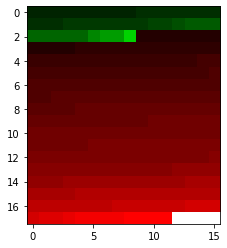

average change: -1.5527 %


 57%|█████▋    | 286/505 [04:47<03:39,  1.00s/it]

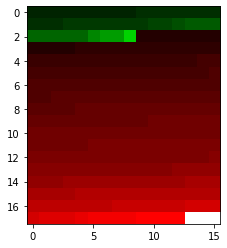

average change: -1.5625 %


 57%|█████▋    | 287/505 [04:48<03:38,  1.00s/it]

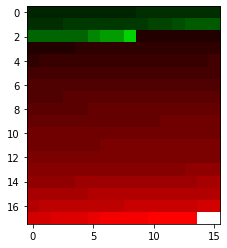

average change: -1.5583 %


 57%|█████▋    | 288/505 [04:49<03:37,  1.00s/it]

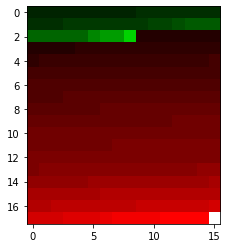

average change: -1.5579 %


 57%|█████▋    | 289/505 [04:50<03:36,  1.00s/it]

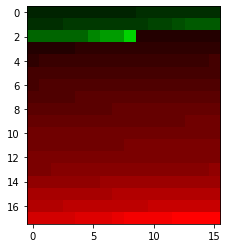

average change: -1.5554000000000001 %


 57%|█████▋    | 290/505 [04:51<03:35,  1.00s/it]

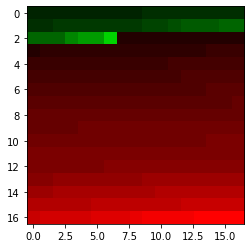

average change: -1.5611 %


 58%|█████▊    | 291/505 [04:52<03:34,  1.00s/it]

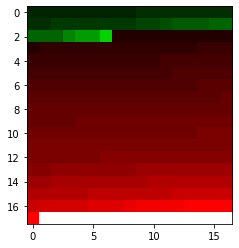

average change: -1.5744 %


 58%|█████▊    | 292/505 [04:53<03:33,  1.00s/it]

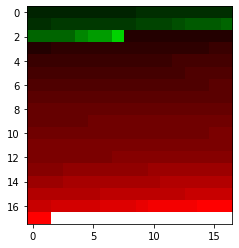

average change: -1.5664 %


 58%|█████▊    | 293/505 [04:54<03:32,  1.00s/it]

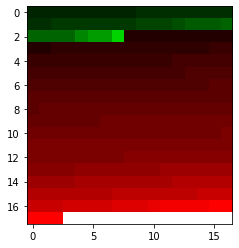

average change: -1.5658999999999998 %


 58%|█████▊    | 294/505 [04:55<03:31,  1.00s/it]

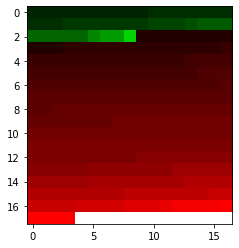

average change: -1.5596999999999999 %


 58%|█████▊    | 295/505 [04:56<03:30,  1.00s/it]

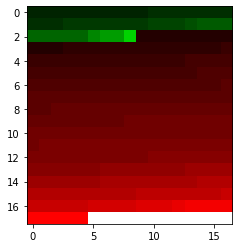

average change: -1.5599999999999998 %


 59%|█████▊    | 296/505 [04:57<03:29,  1.00s/it]

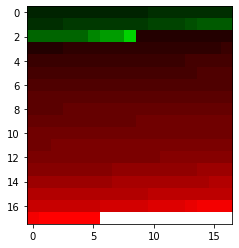

average change: -1.5585 %


 59%|█████▉    | 297/505 [04:58<03:28,  1.00s/it]

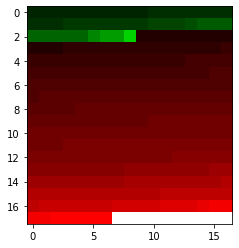

average change: -1.5565 %


 59%|█████▉    | 298/505 [04:59<03:27,  1.00s/it]

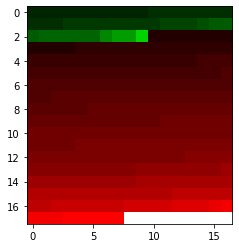

average change: -1.5491 %


 59%|█████▉    | 299/505 [05:00<03:26,  1.00s/it]

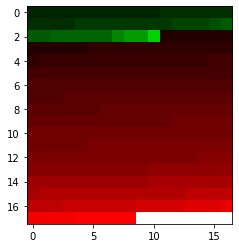

average change: -1.5435 %


 59%|█████▉    | 300/505 [05:01<03:25,  1.00s/it]

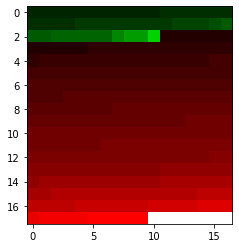

average change: -1.5426 %


 60%|█████▉    | 301/505 [05:02<03:24,  1.00s/it]

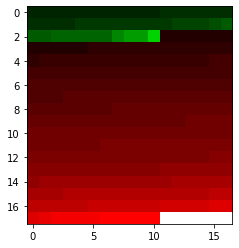

average change: -1.5473999999999999 %


 60%|█████▉    | 302/505 [05:03<03:23,  1.00s/it]

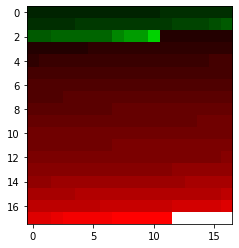

average change: -1.5474999999999999 %


 60%|██████    | 303/505 [05:04<03:22,  1.00s/it]

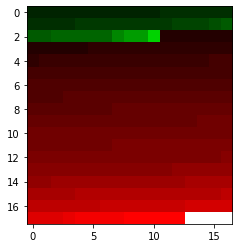

average change: -1.5552 %


 60%|██████    | 304/505 [05:05<03:21,  1.00s/it]

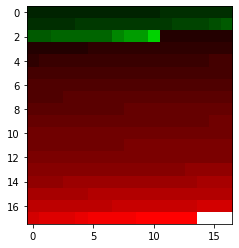

average change: -1.5549 %


 60%|██████    | 305/505 [05:06<03:20,  1.00s/it]

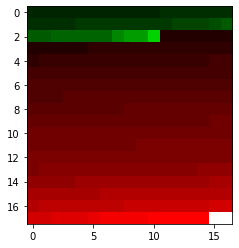

average change: -1.5561 %


 61%|██████    | 306/505 [05:07<03:19,  1.00s/it]

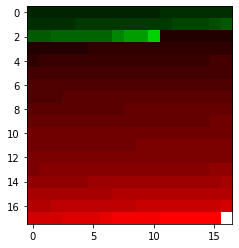

average change: -1.559 %


 61%|██████    | 307/505 [05:08<03:18,  1.00s/it]

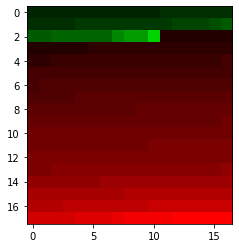

average change: -1.5552 %


 61%|██████    | 308/505 [05:09<03:17,  1.00s/it]

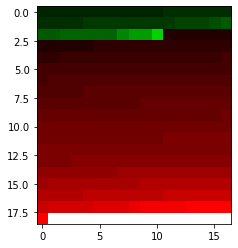

average change: -1.5564 %


 61%|██████    | 309/505 [05:10<03:16,  1.00s/it]

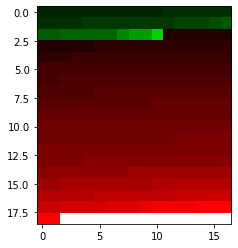

average change: -1.5523 %


 61%|██████▏   | 310/505 [05:11<03:15,  1.00s/it]

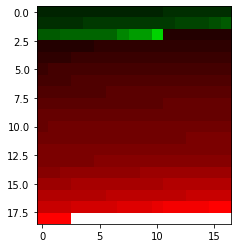

average change: -1.5495 %


 62%|██████▏   | 311/505 [05:12<03:14,  1.00s/it]

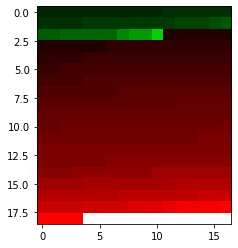

average change: -1.5448 %


 62%|██████▏   | 312/505 [05:13<03:13,  1.00s/it]

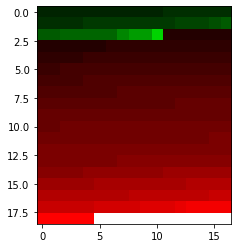

average change: -1.5457 %


 62%|██████▏   | 313/505 [05:14<03:12,  1.00s/it]

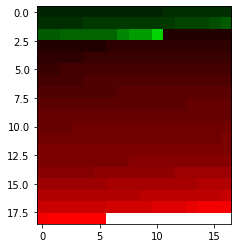

average change: -1.5449 %


 62%|██████▏   | 314/505 [05:15<03:11,  1.00s/it]

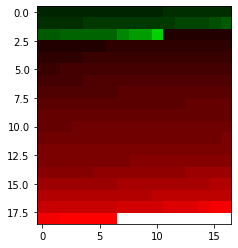

average change: -1.5481 %


 62%|██████▏   | 315/505 [05:16<03:10,  1.00s/it]

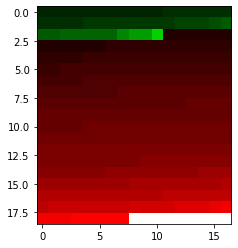

average change: -1.5487000000000002 %


 63%|██████▎   | 316/505 [05:17<03:09,  1.00s/it]

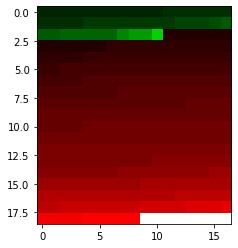

average change: -1.5504 %


 63%|██████▎   | 317/505 [05:18<03:08,  1.00s/it]

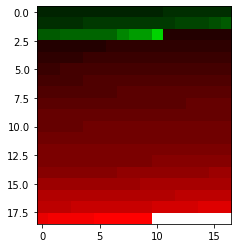

average change: -1.5569 %


 63%|██████▎   | 318/505 [05:19<03:07,  1.00s/it]

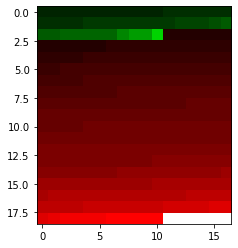

average change: -1.5601 %


 63%|██████▎   | 319/505 [05:20<03:06,  1.00s/it]

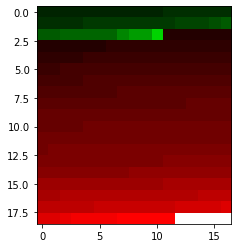

average change: -1.5613 %


 63%|██████▎   | 320/505 [05:21<03:05,  1.00s/it]

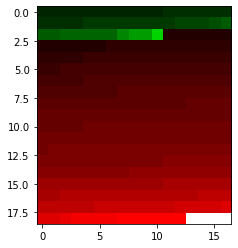

average change: -1.5764 %


 64%|██████▎   | 321/505 [05:22<03:04,  1.00s/it]

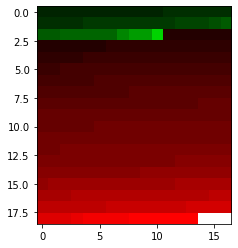

average change: -1.5738999999999999 %


 64%|██████▍   | 322/505 [05:23<03:03,  1.00s/it]

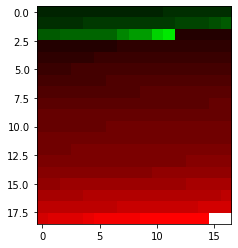

average change: -1.5548 %


 64%|██████▍   | 323/505 [05:24<03:02,  1.00s/it]

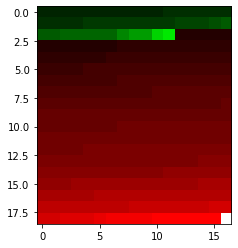

average change: -1.5508 %


 64%|██████▍   | 324/505 [05:25<03:01,  1.00s/it]

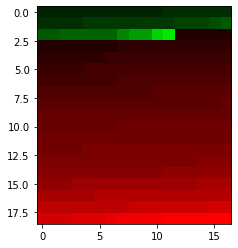

average change: -1.5589 %


 64%|██████▍   | 325/505 [05:26<03:00,  1.00s/it]

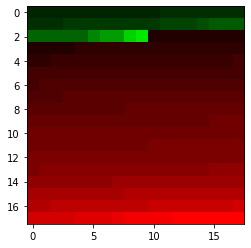

average change: -1.5625 %


 65%|██████▍   | 326/505 [05:27<02:59,  1.00s/it]

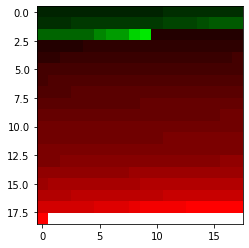

average change: -1.5618999999999998 %


 65%|██████▍   | 327/505 [05:28<02:58,  1.00s/it]

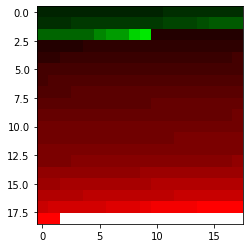

average change: -1.5611 %


 65%|██████▍   | 328/505 [05:29<02:57,  1.00s/it]

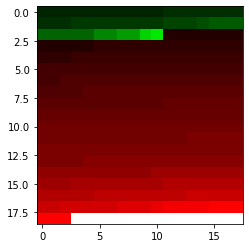

average change: -1.5492000000000001 %


 65%|██████▌   | 329/505 [05:30<02:56,  1.00s/it]

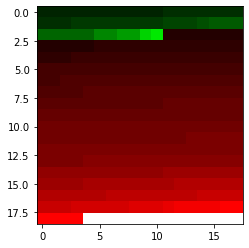

average change: -1.5524 %


 65%|██████▌   | 330/505 [05:31<02:55,  1.00s/it]

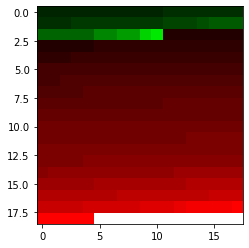

average change: -1.5549 %


 66%|██████▌   | 331/505 [05:32<02:54,  1.00s/it]

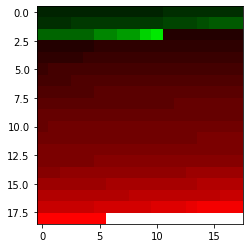

average change: -1.5516 %


 66%|██████▌   | 332/505 [05:33<02:53,  1.00s/it]

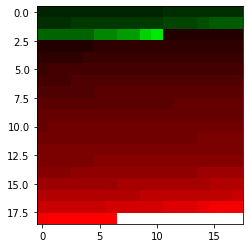

average change: -1.554 %


 66%|██████▌   | 333/505 [05:34<02:52,  1.00s/it]

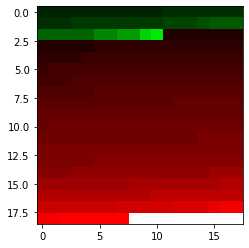

average change: -1.5573 %


 66%|██████▌   | 334/505 [05:35<02:51,  1.00s/it]

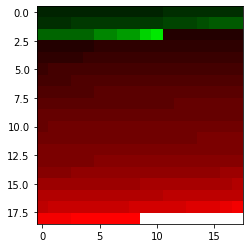

average change: -1.5608 %


 66%|██████▋   | 335/505 [05:36<02:50,  1.00s/it]

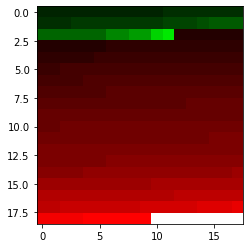

average change: -1.5513000000000001 %


 67%|██████▋   | 336/505 [05:37<02:49,  1.00s/it]

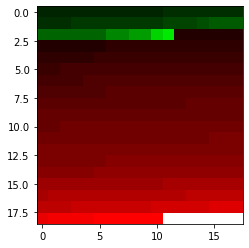

average change: -1.5537 %


 67%|██████▋   | 337/505 [05:38<02:48,  1.00s/it]

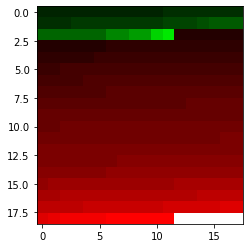

average change: -1.5546 %


 67%|██████▋   | 338/505 [05:39<02:47,  1.00s/it]

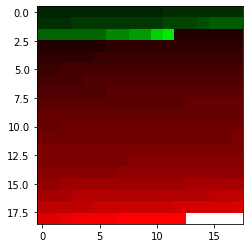

average change: -1.5559 %


 67%|██████▋   | 339/505 [05:40<02:46,  1.00s/it]

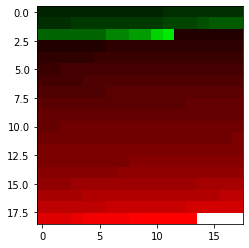

average change: -1.5592 %


 67%|██████▋   | 340/505 [05:41<02:45,  1.00s/it]

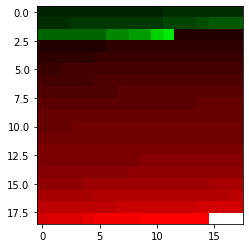

average change: -1.5575 %


 68%|██████▊   | 341/505 [05:42<02:44,  1.00s/it]

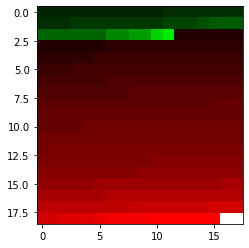

average change: -1.5546 %


 68%|██████▊   | 342/505 [05:43<02:43,  1.00s/it]

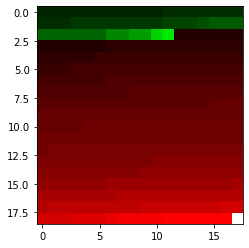

average change: -1.5575999999999999 %


 68%|██████▊   | 343/505 [05:44<02:42,  1.00s/it]

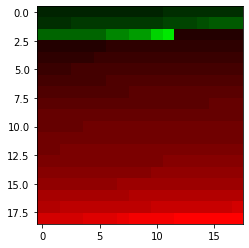

average change: -1.5583 %


 68%|██████▊   | 344/505 [05:45<02:41,  1.00s/it]

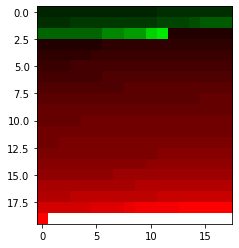

average change: -1.5631 %


 68%|██████▊   | 345/505 [05:46<02:40,  1.00s/it]

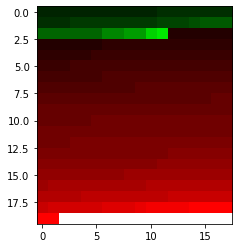

average change: -1.5621 %


 69%|██████▊   | 346/505 [05:47<02:39,  1.00s/it]

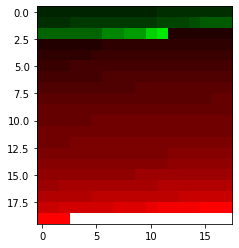

average change: -1.5643 %


 69%|██████▊   | 347/505 [05:48<02:38,  1.00s/it]

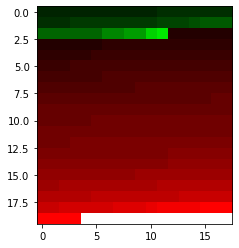

average change: -1.575 %


 69%|██████▉   | 348/505 [05:49<02:37,  1.00s/it]

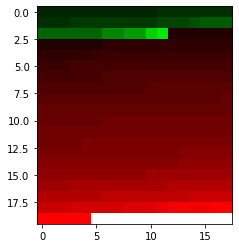

average change: -1.5738999999999999 %


 69%|██████▉   | 349/505 [05:50<02:36,  1.00s/it]

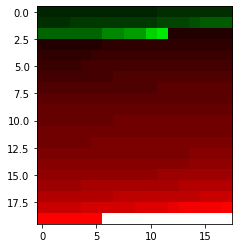

average change: -1.5711 %


 69%|██████▉   | 350/505 [05:51<02:35,  1.00s/it]

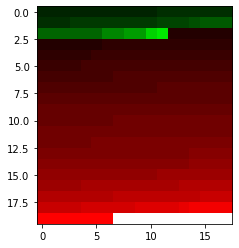

average change: -1.5789000000000002 %


 70%|██████▉   | 351/505 [05:52<02:34,  1.00s/it]

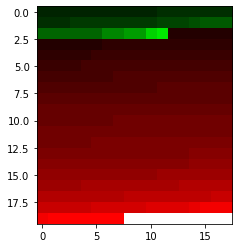

average change: -1.5838 %


 70%|██████▉   | 352/505 [05:53<02:33,  1.00s/it]

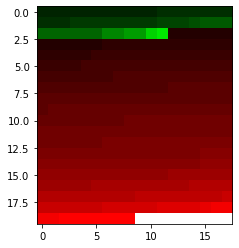

average change: -1.5824999999999998 %


 70%|██████▉   | 353/505 [05:54<02:32,  1.00s/it]

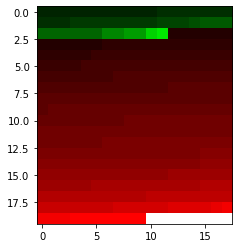

average change: -1.5869000000000002 %


 70%|███████   | 354/505 [05:55<02:31,  1.00s/it]

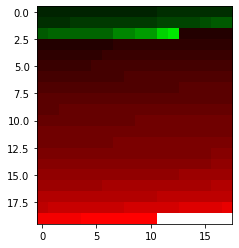

average change: -1.5796999999999999 %


 70%|███████   | 355/505 [05:56<02:30,  1.00s/it]

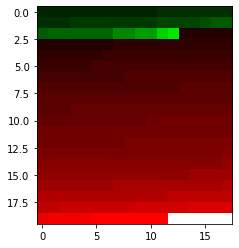

average change: -1.5793000000000001 %


 70%|███████   | 356/505 [05:57<02:29,  1.00s/it]

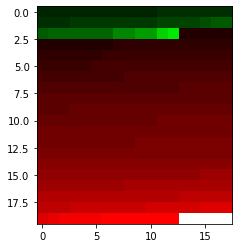

average change: -1.5792000000000002 %


 71%|███████   | 357/505 [05:58<02:28,  1.00s/it]

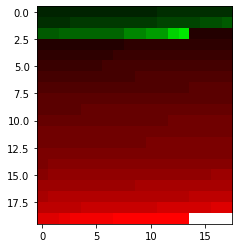

average change: -1.5717999999999999 %


 71%|███████   | 358/505 [05:59<02:27,  1.00s/it]

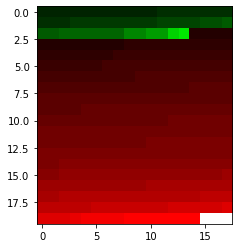

average change: -1.5735999999999999 %


 71%|███████   | 359/505 [06:00<02:26,  1.00s/it]

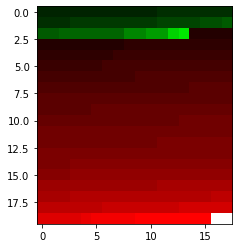

average change: -1.5730000000000002 %


 71%|███████▏  | 360/505 [06:01<02:25,  1.00s/it]

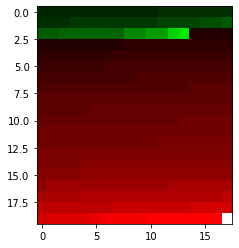

average change: -1.5744999999999998 %


 71%|███████▏  | 361/505 [06:02<02:24,  1.00s/it]

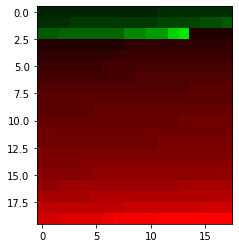

average change: -1.5771 %


 72%|███████▏  | 362/505 [06:03<02:23,  1.00s/it]

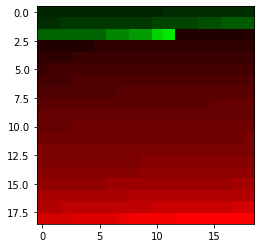

average change: -1.5796999999999999 %


 72%|███████▏  | 363/505 [06:04<02:22,  1.00s/it]

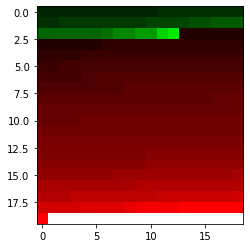

average change: -1.5699 %


 72%|███████▏  | 364/505 [06:05<02:21,  1.00s/it]

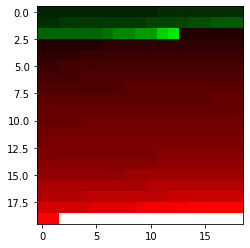

average change: -1.5706000000000002 %


 72%|███████▏  | 365/505 [06:06<02:20,  1.00s/it]

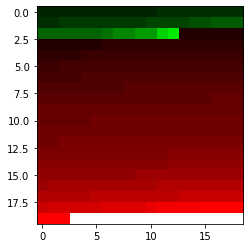

average change: -1.5709999999999997 %


 72%|███████▏  | 366/505 [06:07<02:19,  1.00s/it]

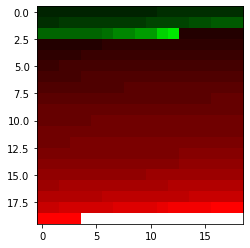

average change: -1.572 %


 73%|███████▎  | 367/505 [06:08<02:18,  1.00s/it]

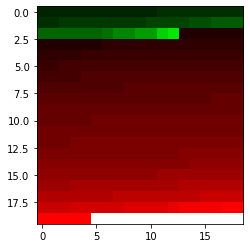

average change: -1.5741999999999998 %


 73%|███████▎  | 368/505 [06:09<02:17,  1.00s/it]

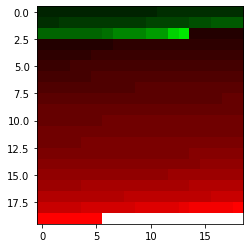

average change: -1.5634 %


 73%|███████▎  | 369/505 [06:10<02:16,  1.00s/it]

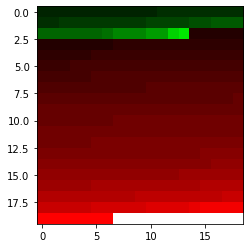

average change: -1.5623 %


 73%|███████▎  | 370/505 [06:11<02:15,  1.00s/it]

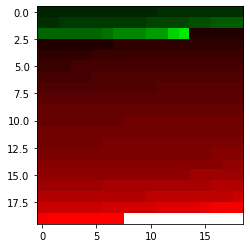

average change: -1.5614 %


 73%|███████▎  | 371/505 [06:12<02:14,  1.00s/it]

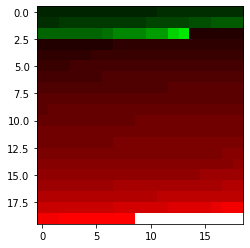

average change: -1.5598 %


 74%|███████▎  | 372/505 [06:13<02:13,  1.00s/it]

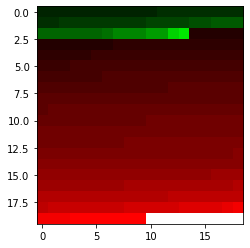

average change: -1.5596999999999999 %


 74%|███████▍  | 373/505 [06:14<02:12,  1.00s/it]

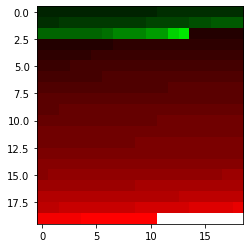

average change: -1.5593 %


 74%|███████▍  | 374/505 [06:15<02:11,  1.00s/it]

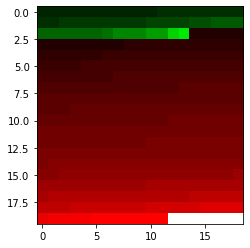

average change: -1.5551000000000001 %


 74%|███████▍  | 375/505 [06:16<02:10,  1.00s/it]

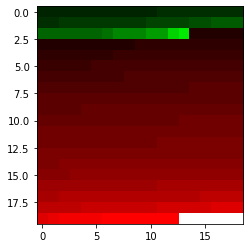

average change: -1.5513000000000001 %


 74%|███████▍  | 376/505 [06:17<02:09,  1.00s/it]

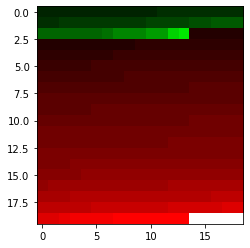

average change: -1.5507 %


 75%|███████▍  | 377/505 [06:18<02:08,  1.00s/it]

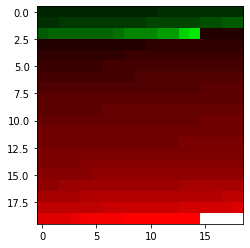

average change: -1.5442 %


 75%|███████▍  | 378/505 [06:19<02:07,  1.00s/it]

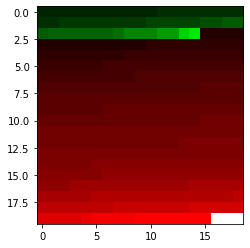

average change: -1.5454 %


 75%|███████▌  | 379/505 [06:20<02:06,  1.00s/it]

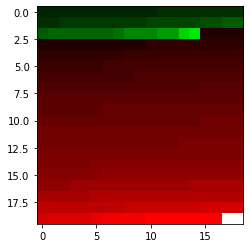

average change: -1.5503 %


 75%|███████▌  | 380/505 [06:21<02:05,  1.00s/it]

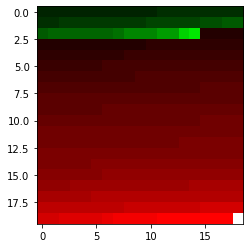

average change: -1.5571 %


 75%|███████▌  | 381/505 [06:22<02:04,  1.00s/it]

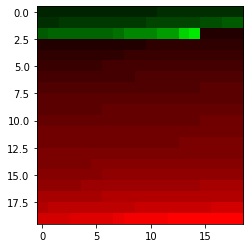

average change: -1.5599999999999998 %


 76%|███████▌  | 382/505 [06:23<02:03,  1.00s/it]

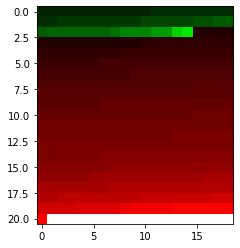

average change: -1.5615999999999999 %


 76%|███████▌  | 383/505 [06:24<02:02,  1.00s/it]

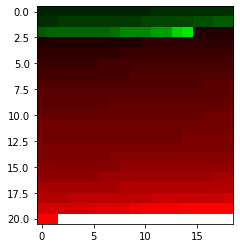

average change: -1.5607 %


 76%|███████▌  | 384/505 [06:25<02:01,  1.00s/it]

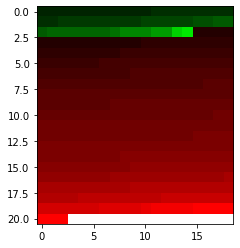

average change: -1.5607 %


 76%|███████▌  | 385/505 [06:26<02:00,  1.00s/it]

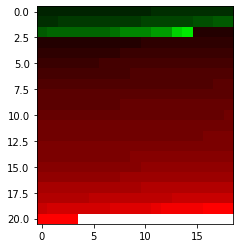

average change: -1.5596 %


 76%|███████▋  | 386/505 [06:27<01:59,  1.00s/it]

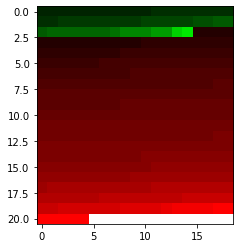

average change: -1.5598 %


 77%|███████▋  | 387/505 [06:28<01:58,  1.00s/it]

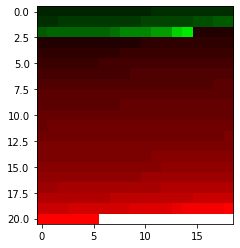

average change: -1.5602 %


 77%|███████▋  | 388/505 [06:29<01:57,  1.00s/it]

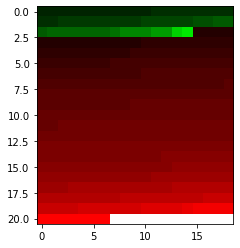

average change: -1.5574 %


 77%|███████▋  | 389/505 [06:30<01:56,  1.00s/it]

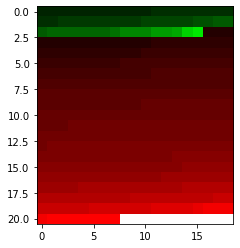

average change: -1.5451 %


 77%|███████▋  | 390/505 [06:31<01:55,  1.00s/it]

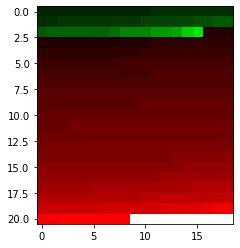

average change: -1.5487000000000002 %


 77%|███████▋  | 391/505 [06:32<01:54,  1.00s/it]

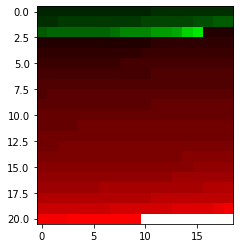

average change: -1.5479 %


 78%|███████▊  | 392/505 [06:33<01:53,  1.00s/it]

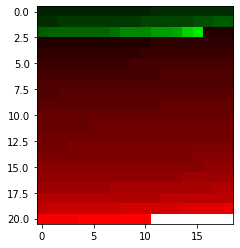

average change: -1.5455999999999999 %


 78%|███████▊  | 393/505 [06:34<01:52,  1.00s/it]

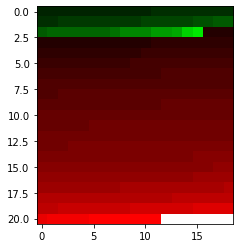

average change: -1.5479 %


 78%|███████▊  | 394/505 [06:35<01:51,  1.00s/it]

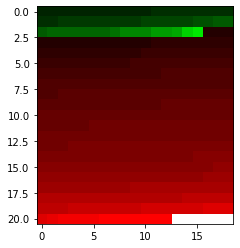

average change: -1.5505 %


 78%|███████▊  | 395/505 [06:36<01:50,  1.00s/it]

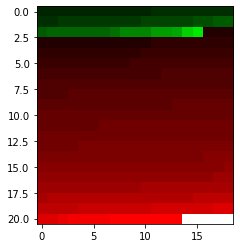

average change: -1.5494 %


 78%|███████▊  | 396/505 [06:37<01:49,  1.00s/it]

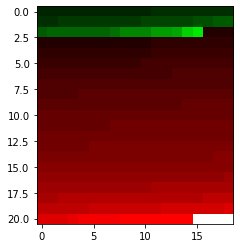

average change: -1.5465 %


 79%|███████▊  | 397/505 [06:38<01:48,  1.00s/it]

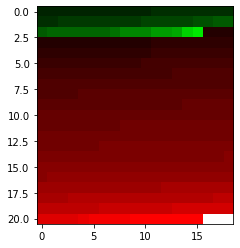

average change: -1.5469 %


 79%|███████▉  | 398/505 [06:39<01:47,  1.00s/it]

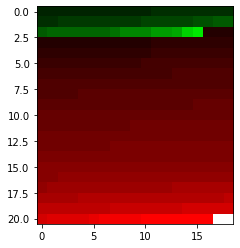

average change: -1.5465 %


 79%|███████▉  | 399/505 [06:40<01:46,  1.00s/it]

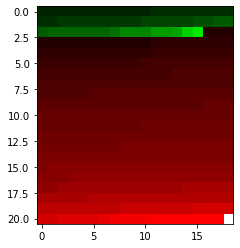

average change: -1.5457 %


 79%|███████▉  | 400/505 [06:41<01:45,  1.00s/it]

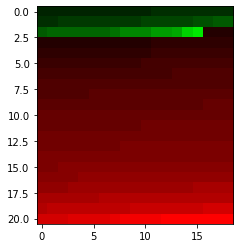

average change: -1.5471000000000001 %


 79%|███████▉  | 401/505 [06:42<01:44,  1.00s/it]

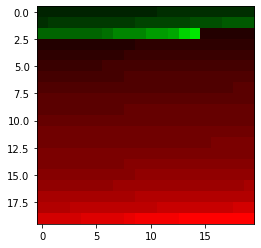

average change: -1.5407 %


 80%|███████▉  | 402/505 [06:43<01:43,  1.00s/it]

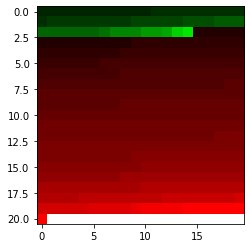

average change: -1.5415999999999999 %


 80%|███████▉  | 403/505 [06:44<01:42,  1.00s/it]

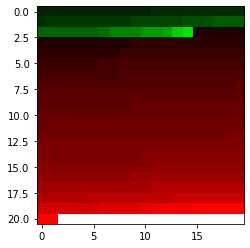

average change: -1.5404 %


 80%|████████  | 404/505 [06:45<01:41,  1.00s/it]

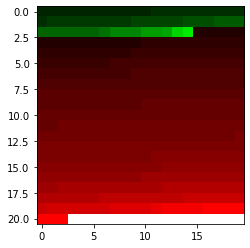

average change: -1.5366 %


 80%|████████  | 405/505 [06:46<01:40,  1.00s/it]

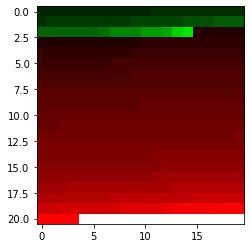

average change: -1.5393999999999999 %


 80%|████████  | 406/505 [06:47<01:39,  1.00s/it]

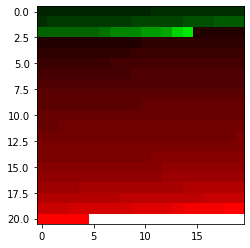

average change: -1.5422 %


 81%|████████  | 407/505 [06:48<01:38,  1.00s/it]

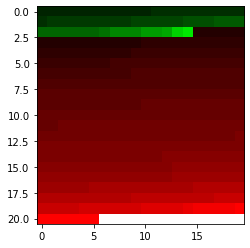

average change: -1.5438 %


 81%|████████  | 408/505 [06:49<01:37,  1.00s/it]

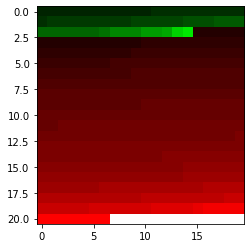

average change: -1.5455999999999999 %


 81%|████████  | 409/505 [06:50<01:36,  1.00s/it]

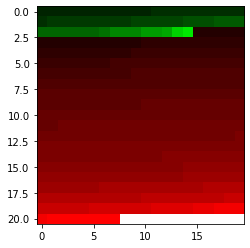

average change: -1.553 %


 81%|████████  | 410/505 [06:51<01:35,  1.00s/it]

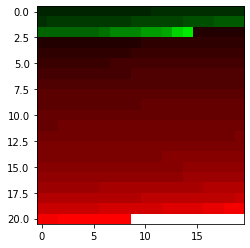

average change: -1.558 %


 81%|████████▏ | 411/505 [06:52<01:34,  1.00s/it]

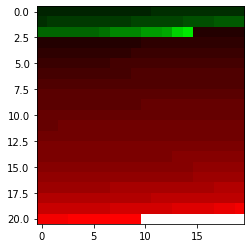

average change: -1.5586 %


 82%|████████▏ | 412/505 [06:53<01:33,  1.00s/it]

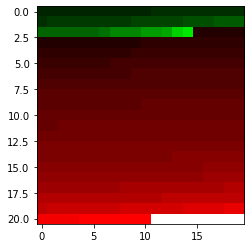

average change: -1.5605 %


 82%|████████▏ | 413/505 [06:54<01:32,  1.00s/it]

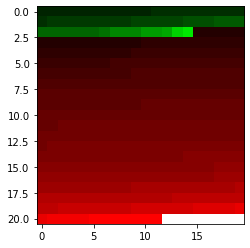

average change: -1.5614 %


 82%|████████▏ | 414/505 [06:55<01:31,  1.00s/it]

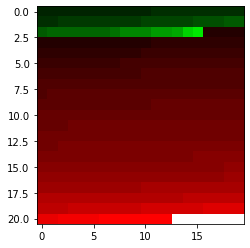

average change: -1.5565 %


 82%|████████▏ | 415/505 [06:56<01:30,  1.00s/it]

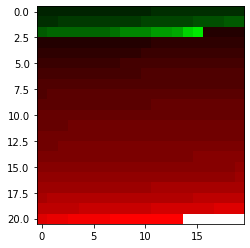

average change: -1.5584 %


 82%|████████▏ | 416/505 [06:57<01:29,  1.00s/it]

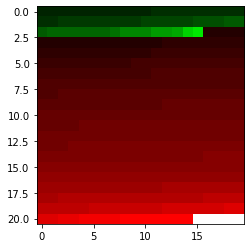

average change: -1.5547 %


 83%|████████▎ | 417/505 [06:58<01:28,  1.00s/it]

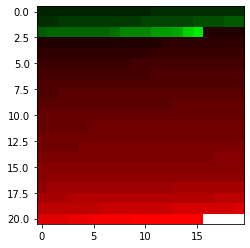

average change: -1.5542 %


 83%|████████▎ | 418/505 [06:59<01:27,  1.00s/it]

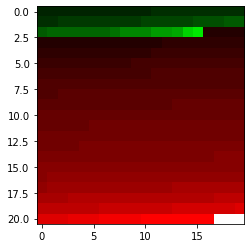

average change: -1.5615 %


 83%|████████▎ | 419/505 [07:00<01:26,  1.00s/it]

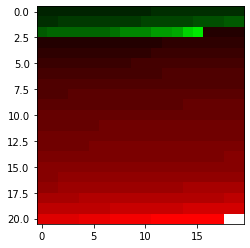

average change: -1.5598 %


 83%|████████▎ | 420/505 [07:01<01:25,  1.00s/it]

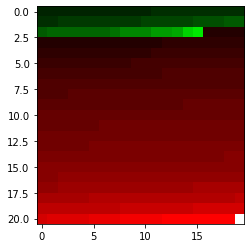

average change: -1.5626999999999998 %


 83%|████████▎ | 421/505 [07:02<01:24,  1.00s/it]

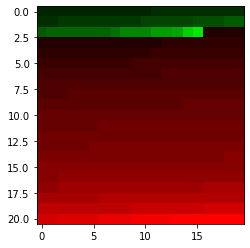

average change: -1.5657999999999999 %


 84%|████████▎ | 422/505 [07:03<01:23,  1.00s/it]

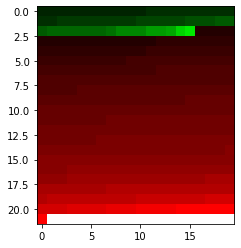

average change: -1.5647000000000002 %


 84%|████████▍ | 423/505 [07:04<01:22,  1.00s/it]

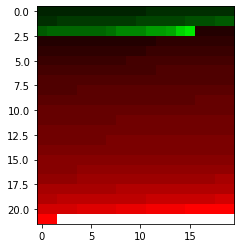

average change: -1.564 %


 84%|████████▍ | 424/505 [07:05<01:21,  1.00s/it]

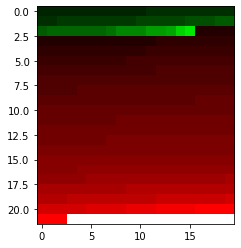

average change: -1.5663 %


 84%|████████▍ | 425/505 [07:06<01:20,  1.00s/it]

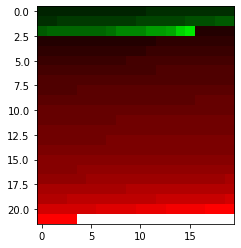

average change: -1.5720999999999998 %


 84%|████████▍ | 426/505 [07:07<01:19,  1.00s/it]

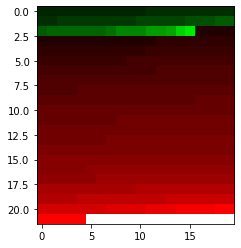

average change: -1.5737999999999999 %


 85%|████████▍ | 427/505 [07:08<01:18,  1.00s/it]

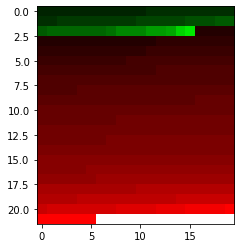

average change: -1.5784 %


 85%|████████▍ | 428/505 [07:09<01:17,  1.00s/it]

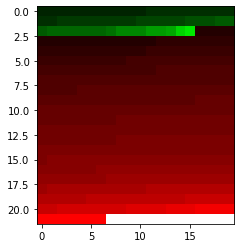

average change: -1.5791 %


 85%|████████▍ | 429/505 [07:10<01:16,  1.00s/it]

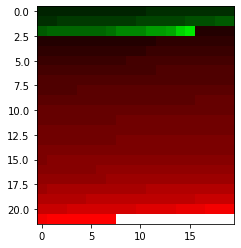

average change: -1.5841 %


 85%|████████▌ | 430/505 [07:11<01:15,  1.00s/it]

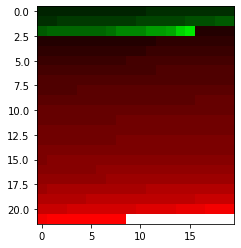

average change: -1.5935000000000001 %


 85%|████████▌ | 431/505 [07:12<01:14,  1.00s/it]

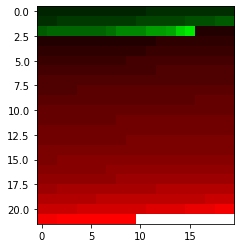

average change: -1.5942999999999998 %


 86%|████████▌ | 432/505 [07:13<01:13,  1.00s/it]

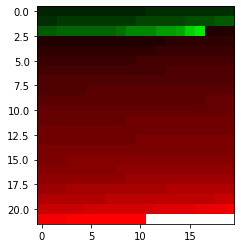

average change: -1.5873000000000002 %


 86%|████████▌ | 433/505 [07:14<01:12,  1.00s/it]

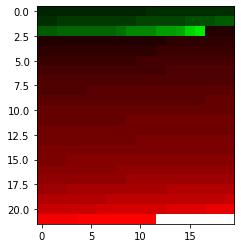

average change: -1.5921999999999998 %


 86%|████████▌ | 434/505 [07:15<01:11,  1.00s/it]

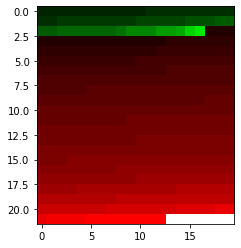

average change: -1.5945 %


 86%|████████▌ | 435/505 [07:16<01:10,  1.00s/it]

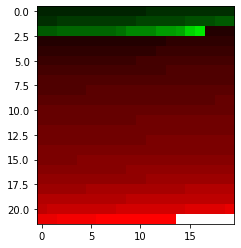

average change: -1.5939999999999999 %


 86%|████████▋ | 436/505 [07:17<01:09,  1.00s/it]

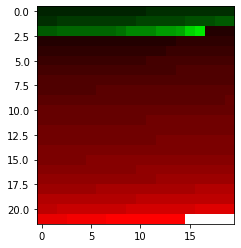

average change: -1.5907 %


 87%|████████▋ | 437/505 [07:18<01:08,  1.00s/it]

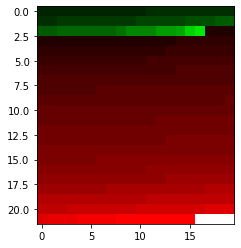

average change: -1.5909 %


 87%|████████▋ | 438/505 [07:19<01:07,  1.00s/it]

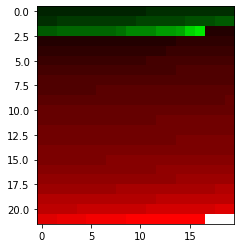

average change: -1.5914000000000001 %


 87%|████████▋ | 439/505 [07:20<01:06,  1.00s/it]

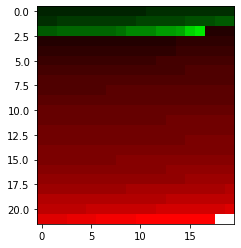

average change: -1.5883999999999998 %


 87%|████████▋ | 440/505 [07:21<01:05,  1.00s/it]

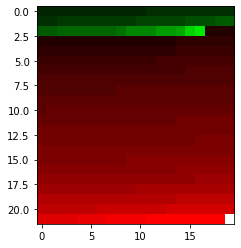

average change: -1.5871 %


 87%|████████▋ | 441/505 [07:22<01:04,  1.00s/it]

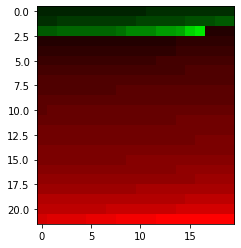

average change: -1.591 %


 88%|████████▊ | 442/505 [07:23<01:03,  1.00s/it]

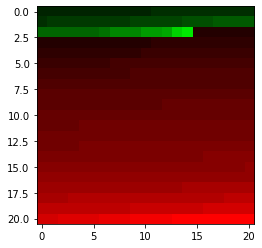

average change: -1.5912 %


 88%|████████▊ | 443/505 [07:24<01:02,  1.00s/it]

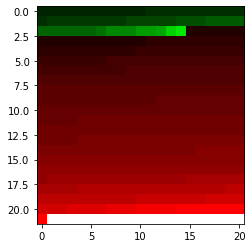

average change: -1.5931000000000002 %


 88%|████████▊ | 444/505 [07:25<01:01,  1.00s/it]

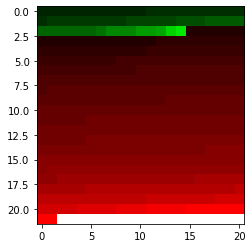

average change: -1.5896000000000001 %


 88%|████████▊ | 445/505 [07:26<01:00,  1.00s/it]

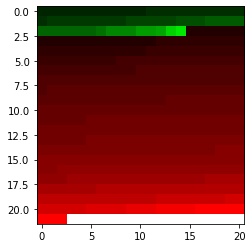

average change: -1.5906 %


 88%|████████▊ | 446/505 [07:27<00:59,  1.00s/it]

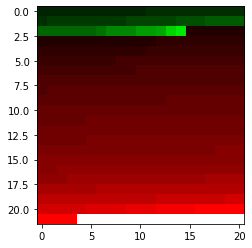

average change: -1.6027 %


 89%|████████▊ | 447/505 [07:28<00:58,  1.00s/it]

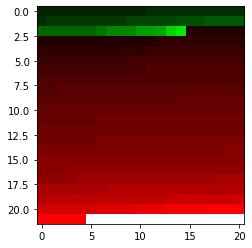

average change: -1.6004999999999998 %


 89%|████████▊ | 448/505 [07:29<00:57,  1.00s/it]

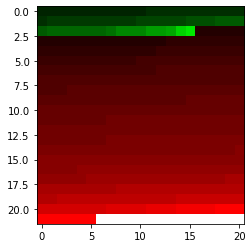

average change: -1.5953 %


 89%|████████▉ | 449/505 [07:30<00:56,  1.00s/it]

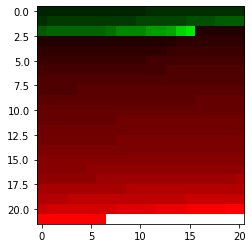

average change: -1.5923 %


 89%|████████▉ | 450/505 [07:31<00:55,  1.00s/it]

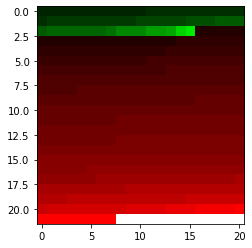

average change: -1.5982 %


 89%|████████▉ | 451/505 [07:32<00:54,  1.00s/it]

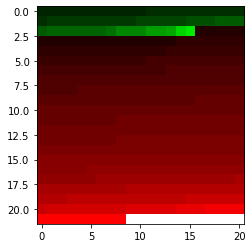

average change: -1.6040999999999999 %


 90%|████████▉ | 452/505 [07:33<00:53,  1.00s/it]

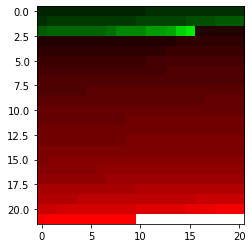

average change: -1.6032000000000002 %


 90%|████████▉ | 453/505 [07:34<00:52,  1.00s/it]

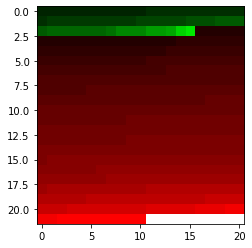

average change: -1.6060999999999999 %


 90%|████████▉ | 454/505 [07:35<00:51,  1.00s/it]

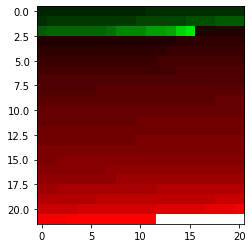

average change: -1.6038000000000001 %


 90%|█████████ | 455/505 [07:36<00:50,  1.00s/it]

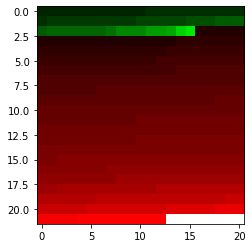

average change: -1.6081 %


 90%|█████████ | 456/505 [07:37<00:49,  1.00s/it]

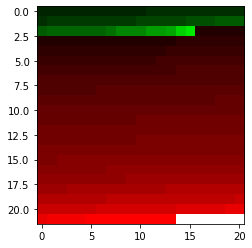

average change: -1.6102 %


 90%|█████████ | 457/505 [07:38<00:48,  1.00s/it]

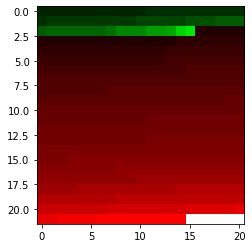

average change: -1.6078 %


 91%|█████████ | 458/505 [07:39<00:47,  1.00s/it]

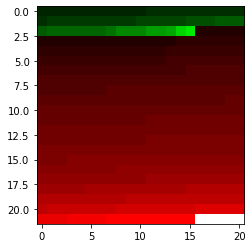

average change: -1.6101 %


 91%|█████████ | 459/505 [07:40<00:46,  1.00s/it]

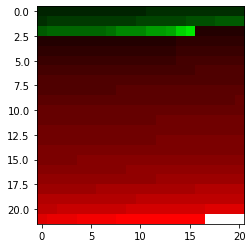

average change: -1.6076 %


 91%|█████████ | 460/505 [07:41<00:45,  1.00s/it]

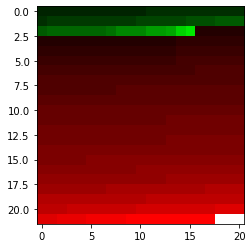

average change: -1.6070999999999998 %


 91%|█████████▏| 461/505 [07:42<00:44,  1.00s/it]

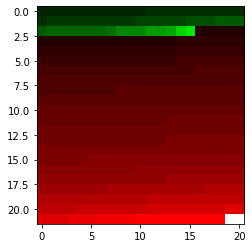

average change: -1.6113 %


 91%|█████████▏| 462/505 [07:43<00:43,  1.00s/it]

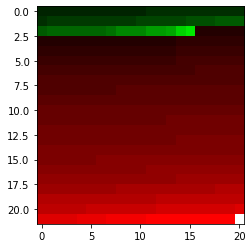

average change: -1.6121 %


 92%|█████████▏| 463/505 [07:44<00:42,  1.00s/it]

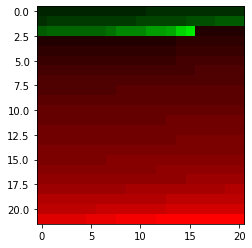

average change: -1.6133000000000002 %


 92%|█████████▏| 464/505 [07:45<00:41,  1.00s/it]

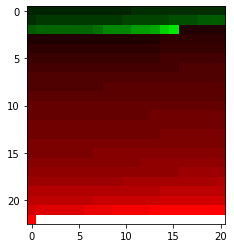

average change: -1.6157000000000001 %


 92%|█████████▏| 465/505 [07:46<00:40,  1.00s/it]

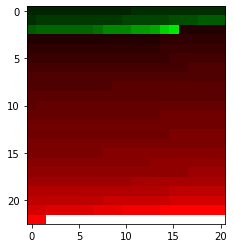

average change: -1.6135 %


 92%|█████████▏| 466/505 [07:47<00:39,  1.00s/it]

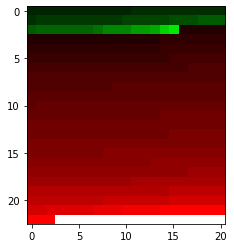

average change: -1.6215 %


 92%|█████████▏| 467/505 [07:48<00:38,  1.00s/it]

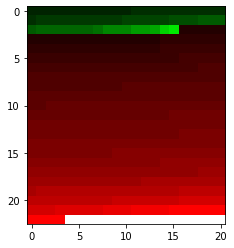

average change: -1.6194 %


 93%|█████████▎| 468/505 [07:49<00:37,  1.00s/it]

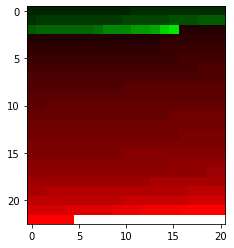

average change: -1.6204 %


 93%|█████████▎| 469/505 [07:50<00:36,  1.01s/it]

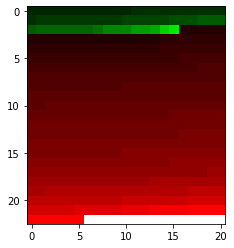

average change: -1.6259 %


 93%|█████████▎| 470/505 [07:51<00:35,  1.01s/it]

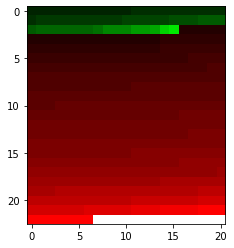

average change: -1.6236000000000002 %


 93%|█████████▎| 471/505 [07:52<00:34,  1.00s/it]

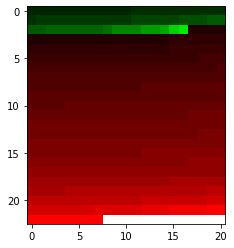

average change: -1.6188999999999998 %


 93%|█████████▎| 472/505 [07:53<00:33,  1.00s/it]

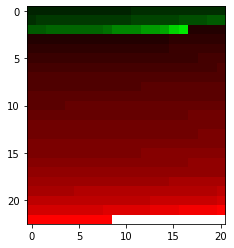

average change: -1.6219000000000001 %


 94%|█████████▎| 473/505 [07:54<00:32,  1.00s/it]

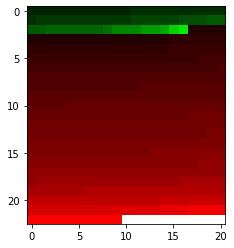

average change: -1.6223 %


 94%|█████████▍| 474/505 [07:55<00:31,  1.00s/it]

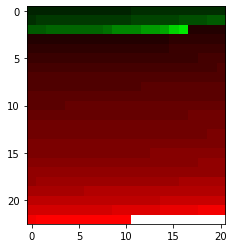

average change: -1.6288 %


 94%|█████████▍| 475/505 [07:56<00:30,  1.00s/it]

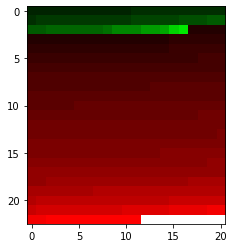

average change: -1.6273 %


 94%|█████████▍| 476/505 [07:57<00:29,  1.00s/it]

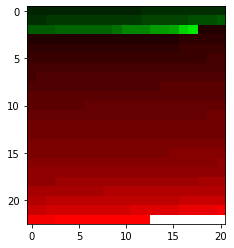

average change: -1.6233999999999997 %


 94%|█████████▍| 477/505 [07:58<00:28,  1.00s/it]

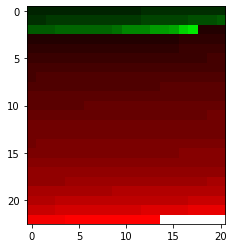

average change: -1.6238 %


 95%|█████████▍| 478/505 [07:59<00:27,  1.00s/it]

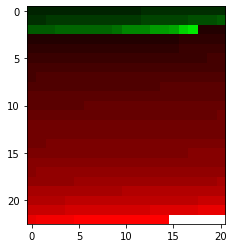

average change: -1.6237000000000001 %


 95%|█████████▍| 479/505 [08:00<00:26,  1.00s/it]

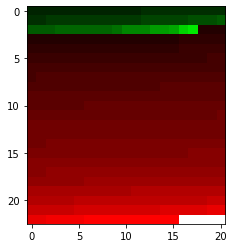

average change: -1.6254000000000002 %


 95%|█████████▌| 480/505 [08:01<00:25,  1.00s/it]

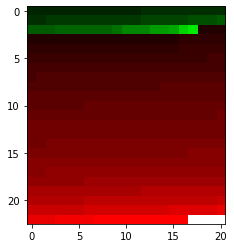

average change: -1.6282999999999999 %


 95%|█████████▌| 481/505 [08:02<00:24,  1.00s/it]

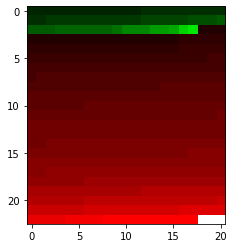

average change: -1.6337000000000002 %


 95%|█████████▌| 482/505 [08:03<00:23,  1.00s/it]

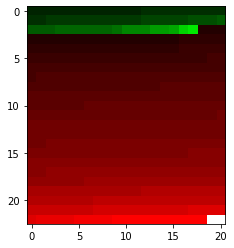

average change: -1.6374 %


 96%|█████████▌| 483/505 [08:04<00:22,  1.00s/it]

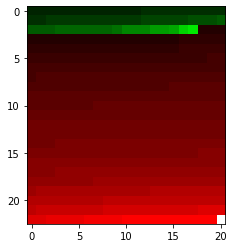

average change: -1.6362 %


 96%|█████████▌| 484/505 [08:05<00:21,  1.00s/it]

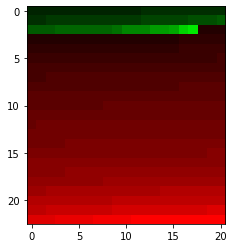

average change: -1.6343 %


 96%|█████████▌| 485/505 [08:06<00:20,  1.00s/it]

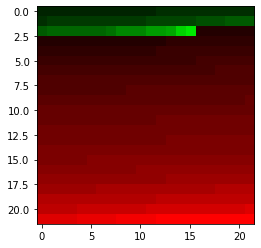

average change: -1.6321999999999999 %


 96%|█████████▌| 486/505 [08:07<00:19,  1.00s/it]

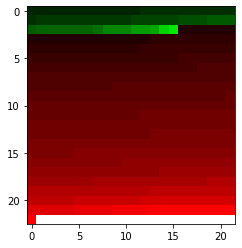

average change: -1.6341 %


 96%|█████████▋| 487/505 [08:08<00:18,  1.00s/it]

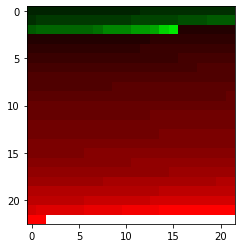

average change: -1.6340000000000001 %


 97%|█████████▋| 488/505 [08:09<00:17,  1.00s/it]

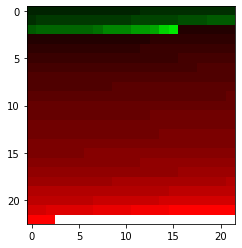

average change: -1.6356 %


 97%|█████████▋| 489/505 [08:10<00:16,  1.00s/it]

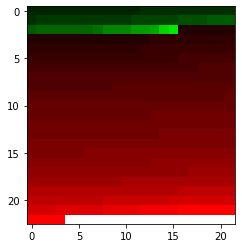

average change: -1.6374 %


 97%|█████████▋| 490/505 [08:11<00:15,  1.00s/it]

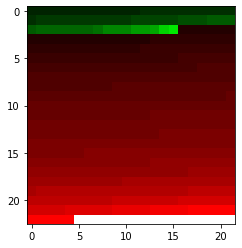

average change: -1.6404999999999998 %


 97%|█████████▋| 491/505 [08:12<00:14,  1.00s/it]

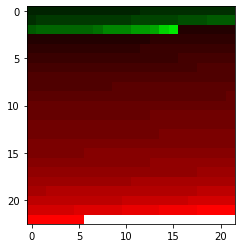

average change: -1.6426 %


 97%|█████████▋| 492/505 [08:13<00:13,  1.00s/it]

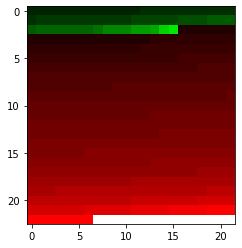

average change: -1.6457 %


 98%|█████████▊| 493/505 [08:14<00:12,  1.00s/it]

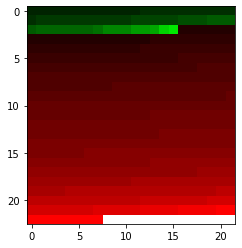

average change: -1.6487000000000003 %


 98%|█████████▊| 494/505 [08:15<00:11,  1.00s/it]

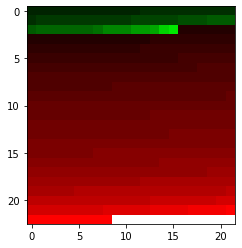

average change: -1.649 %


 98%|█████████▊| 495/505 [08:16<00:10,  1.00s/it]

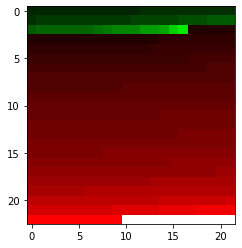

average change: -1.6415 %


 98%|█████████▊| 496/505 [08:17<00:09,  1.00s/it]

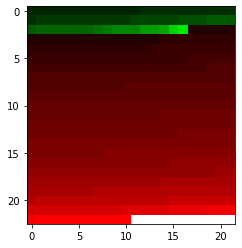

average change: -1.644 %


 98%|█████████▊| 497/505 [08:18<00:08,  1.00s/it]

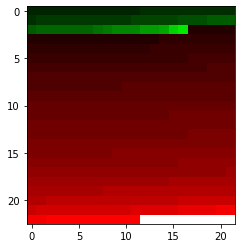

average change: -1.6438000000000001 %


 99%|█████████▊| 498/505 [08:19<00:07,  1.00s/it]

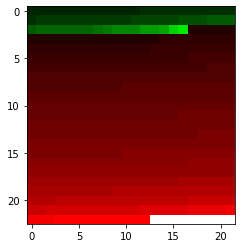

average change: -1.6435000000000002 %


 99%|█████████▉| 499/505 [08:20<00:06,  1.00s/it]

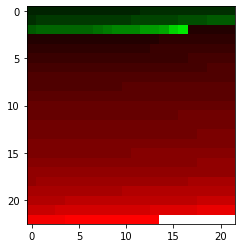

average change: -1.6444 %


 99%|█████████▉| 500/505 [08:21<00:05,  1.00s/it]

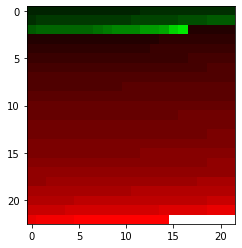

average change: -1.6451 %


 99%|█████████▉| 501/505 [08:22<00:04,  1.00s/it]

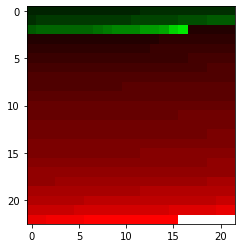

average change: -1.6469 %


 99%|█████████▉| 502/505 [08:23<00:03,  1.00s/it]

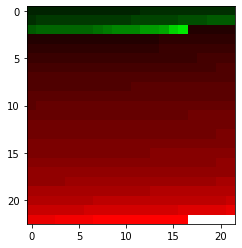

average change: -1.6442999999999999 %


100%|█████████▉| 503/505 [08:24<00:02,  1.00s/it]

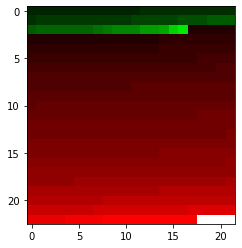

average change: -1.6442999999999999 %


100%|█████████▉| 504/505 [08:25<00:01,  1.00s/it]

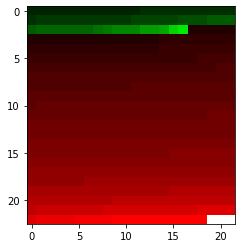

average change: -1.6441999999999999 %


100%|██████████| 505/505 [08:26<00:00,  1.00s/it]


In [ ]:
change_df = update_stock_df()

In [ ]:
print(change_df.sort_values(by=["change"]))


     stock    change
444   TSLA -0.069979
318   MRNA -0.063737
86     CCL -0.060437
195    FRC -0.056650
428    STT -0.056259
289    LKQ -0.054262
464    UAL -0.053325
345   NCLH -0.052554
18     ALB -0.052020
29     AMD -0.050930
92     CDW -0.049947
171   ENPH -0.048636
10     AAP -0.048172
155    DPZ -0.047642
472   VRSK -0.047307
416    NOW -0.046260
407   ROST -0.045750
31     AAL -0.045324
140     DE -0.044745
284    LEN -0.043675
202   FTNT -0.043342
348   NVDA -0.042882
449   TSCO -0.042773
479    VMC -0.042390
448    TJX -0.042299
467    URI -0.042008
101   CHTR -0.041814
322   MPWR -0.041545
69      BK -0.041337
378    PPG -0.041317
141    DAL -0.041299
213   GNRC -0.040642
423   SEDG -0.040476
180   ETSY -0.039805
134    CMI -0.039096
93      CE -0.038662
301    MLM -0.038650
119  CMCSA -0.038560
216    GPC -0.038434
253     IP -0.038371
144   DXCM -0.037472
427   SBUX -0.037160
431   SIVB -0.037020
161     DD -0.036814
88    CTLT -0.036685
315     MU -0.035994
270    KEY -0

In [ ]:
print(os.path.getsize("/content/drive/MyDrive/Investment_Analysis/s&p_500_stock_df.txt")/1024/1024/1024)

0.14525594282895327
